# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config inlineBackend.figure_format = 'retina'
pd.set_option('max_columns', 30)
pd.set_option('max_rows', 200)

# Read CSV file that was scraped!

In [2]:
df = pd.read_csv('AllPhnomList.csv', encoding='utf8')
df.head(20)

,JobTitle,CompanyName,Category,Salary,JobType,JobFunction,PositionLevel,WorkingDay,WorkingHour,Location,DetailLocation,WorkingExperience,Qualification,Age
0,Sous Chef,Jobs.PhnomList & Business Training Center,Human Resource / Recruitment,Negotiable,Full Time,General Work,Senior Executive,6-day work/week,Office Hour,Phnom Penh,"#106, St.304, Sangkat Beoung kang kong II, Kha...",< 2 years,High School or equivalent,18 - 50
1,Assistant Admin & Acc,Eco Elictric (Pickup & Maman),Electrical and Electronics,Negotiable,Full Time,Clerical/Administrative,Junior Executive,6-day work/week,Office Hour,Phnom Penh,"#153,St.Mao Tse Toung Blvd, Phnom Penh., Phnom...",No preference,Bachelor's Degree,18 - 50
2,Accountant / Stock Controller,Meng Dy Europegas,Automotive / Vehicle,Negotiable,Full Time,General/Cost Accounting,Fresh/Entry Level,NaN,NaN,Phnom Penh,"BanteayMeanchey, Siem Reap, Battambang, Phnom ...",< 2 years,Bachelor's Degree,18 - 28
3,Tax Accountant (Urgent),LIM & TAN Business Solutions.,Human Resource / Recruitment,Negotiable,Full Time,Audit and Taxation,Non-Executive,NaN,NaN,Phnom Penh,"No. 314Eo, Street 150, Sangkat Teuk Laak II, K...",2-5 years,Bachelor's Degree,18 - 50
4,Account officer,"Thai huot Trading Co,. Ltd",Food and Berverage,Negotiable,Full Time,General/Cost Accounting,Non-Executive,NaN,NaN,Phnom Penh,"No. Land 1565, St. Vengsreng, Sangkat Chaom Ch...",< 2 years,Bachelor's Degree,18 - 50
5,Sale and Marketing Manager (3% incentive),"Agriculture, Property & Project Division",Construction / Building / Architecture,Negotiable,Full Time,Top Management,Senior Executive,6-day work/week,Office Hour,Phnom Penh,"Canadia Tower, Room 26A, Floor 26F,St. #315 (A...",2-5 years,Bachelor's Degree,18 - 50
6,Sale & Marketing ($160 - $200),Metfone Battambang Branch,Telecommunication,< $200 USD,Full Time,Retail Sales/General,Non-Executive,NaN,NaN,Phnom Penh,"Battambang Branch, Battambang",< 2 years,Bachelor's Degree,18 - 50
7,Sale Staff (Urgent),"HENG MENG LONG TRADING CO., LTD",Retail / Trading Distribution / Cosumer Products,Negotiable,Full Time,Sales-Corporate,Junior Executive,NaN,NaN,Phnom Penh,"#25-26, National Road 5, Sangkat Km6, Khan Rus...",< 2 years,Bachelor's Degree,18 - 50
8,Financial Accountant (1),M Entertainment Production,Entertainment,Negotiable,Full Time,Corporation Finance/Investment,Non-Executive,NaN,NaN,Phnom Penh,"No 1c, St 134, Sangkat Veal Vong, Kan 7 Makara...",No preference,Bachelor's Degree,18 - 50
9,Marketing Officer,World Vision International,NGO / Non Profit / Social Service,Negotiable,Full Time,Marketing/Business Development,Non-Executive,NaN,NaN,Phnom Penh,"Cambodia, # 20,St.71, Sangkat Tonle Basak, Kha...",2-5 years,Bachelor's Degree,18 - 50


In [3]:
df.shape

(13800, 14)

In [4]:
df.describe(include=['object', 'int', 'float'])

,JobTitle,CompanyName,Category,Salary,JobType,JobFunction,PositionLevel,WorkingDay,WorkingHour,Location,DetailLocation,WorkingExperience,Qualification,Age
count,13800,13800,13800,13800,13800,13800,13800,63,63,13800,13759,13800,13800,13800
unique,8976,2647,44,7,8,134,7,4,1,32,2392,5,31,170
top,Accountant,Khmer Brewery Limited,General Business,Negotiable,Full Time,Top Management,Junior Executive,1-day work/week,Office Hour,Phnom Penh,"Phnom Penh, Phnom Penh",< 2 years,Bachelor's Degree,18 - 50
freq,186,192,1469,12267,13606,2694,7314,46,63,11622,493,5021,10761,9794


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13800 entries, 0 to 13799
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   JobTitle           13800 non-null  object
 1   CompanyName        13800 non-null  object
 2   Category           13800 non-null  object
 3   Salary             13800 non-null  object
 4   JobType            13800 non-null  object
 5   JobFunction        13800 non-null  object
 6   PositionLevel      13800 non-null  object
 7   WorkingDay         63 non-null     object
 8   WorkingHour        63 non-null     object
 9   Location           13800 non-null  object
 10  DetailLocation     13759 non-null  object
 11  WorkingExperience  13800 non-null  object
 12  Qualification      13800 non-null  object
 13  Age                13800 non-null  object
dtypes: object(14)
memory usage: 1.5+ MB


In [6]:
df['Category'].value_counts().sort_values()

Clothing                                                1
Agency / Call Centre                                    1
Chemical/Plastic/Paper/Petrochemical                    1
Airline                                                 1
Jewellery/Gems/Watches                                  2
Energy/Power/Water/Oil & Gas                            2
Cleaning Service                                        2
Quality Control                                         3
Sports & Recreation                                     4
Oil and Gas                                             5
Government Sector                                       5
Freight / Shipping                                      5
Stationery/Books/Toys                                   7
Broadcasting / Publishing                              12
Science and Technology / R&D                           20
Aerospace / Aviation                                   21
Others                                                 26
Legal Service 

In [7]:
df['Category'].duplicated().sum()

13756

In [8]:
df['Salary'].value_counts().sort_values()

$1501 - $2000 USD       13
> $2000 USD             18
$1001 - $1500 USD      141
$501 - $1000 USD       271
< $200 USD             287
$201 - $500 USD        803
Negotiable           12267
Name: Salary, dtype: int64

In [9]:
df['Salary'].duplicated().sum()

13793

In [10]:
df.head()

,JobTitle,CompanyName,Category,Salary,JobType,JobFunction,PositionLevel,WorkingDay,WorkingHour,Location,DetailLocation,WorkingExperience,Qualification,Age
0,Sous Chef,Jobs.PhnomList & Business Training Center,Human Resource / Recruitment,Negotiable,Full Time,General Work,Senior Executive,6-day work/week,Office Hour,Phnom Penh,"#106, St.304, Sangkat Beoung kang kong II, Kha...",< 2 years,High School or equivalent,18 - 50
1,Assistant Admin & Acc,Eco Elictric (Pickup & Maman),Electrical and Electronics,Negotiable,Full Time,Clerical/Administrative,Junior Executive,6-day work/week,Office Hour,Phnom Penh,"#153,St.Mao Tse Toung Blvd, Phnom Penh., Phnom...",No preference,Bachelor's Degree,18 - 50
2,Accountant / Stock Controller,Meng Dy Europegas,Automotive / Vehicle,Negotiable,Full Time,General/Cost Accounting,Fresh/Entry Level,NaN,NaN,Phnom Penh,"BanteayMeanchey, Siem Reap, Battambang, Phnom ...",< 2 years,Bachelor's Degree,18 - 28
3,Tax Accountant (Urgent),LIM & TAN Business Solutions.,Human Resource / Recruitment,Negotiable,Full Time,Audit and Taxation,Non-Executive,NaN,NaN,Phnom Penh,"No. 314Eo, Street 150, Sangkat Teuk Laak II, K...",2-5 years,Bachelor's Degree,18 - 50
4,Account officer,"Thai huot Trading Co,. Ltd",Food and Berverage,Negotiable,Full Time,General/Cost Accounting,Non-Executive,NaN,NaN,Phnom Penh,"No. Land 1565, St. Vengsreng, Sangkat Chaom Ch...",< 2 years,Bachelor's Degree,18 - 50


In [11]:
df['Qualification'].value_counts()

Bachelor's Degree                                                            10761
High School or equivalent                                                     1786
Associate Degree                                                               730
No preference                                                                  212
Master's Degree                                                                107
Others                                                                          58
Certificate (Diploma)                                                           58
Zero(0)                                                                         39
Phd Degree                                                                      13
Vocation Training                                                               11
Professional Degree                                                              3
University degree                                                                2
មានក

In [12]:
df['Qualification'].unique()

array(['High School or equivalent', "Bachelor's Degree",
       "Master's Degree", 'Phd Degree', 'Associate Degree',
       'No preference', 'Zero(0)', 'Others', 'Professional Degree',
       'University degree in banking', 'University degree',
       'The person minimum bachelor degree HR/management',
       'Technical school/institute graduate (preferably electrical or mechanical)',
       'University degree with knowledge',
       'មានកម្រិតវប្បធម៌ចាប់ពីបរិញ្ញាបត្រឡើងទៅ',
       'មានកម្រិតវប្បធម៌ចាប់ពីថ្នាក់ទី ៩ ឡើងទៅ',
       'មានកម្រិតវប្បធម៌ចាប់ពីថ្នាក់ទី ០៩ ឡើងទៅ',
       'ថ្នាក់បរិញ្ញាបត្រ ទាំងកំពុងសិក្សា និងបញ្ជប់',
       'University students or fresh graduates', 'University',
       'កំពុងសិក្សា ឬ គ្រោងនឹងបញ្ចប់ថ្នាក់បរិញ្ញាប័ត្រ',
       'Undergraduate Degree in a related field',
       'បរិញ្ញាបត្រផ្នែកទីផ្សារ ឬជំនាញដែលពាក់ពន្ធ័',
       'បញ្ចប់ថ្នាក់បរិញ្ញាបត្រ ឬជានិសិ្សតឆ្នាំទី៤', 'University Decree',
       '高中及以上', 'ត្រូវបានបញ្ចប់ថ្នាក់ទី១២',
       'Minimum 1 year of 

In [13]:
df['WorkingExperience'].value_counts().sort_values()

> 8 years          73
5-8 years         582
No preference    3370
2-5 years        4754
< 2 years        5021
Name: WorkingExperience, dtype: int64

In [14]:
df['WorkingExperience'].describe()

count         13800
unique            5
top       < 2 years
freq           5021
Name: WorkingExperience, dtype: object

In [15]:
df['WorkingExperience'].unique()

array(['< 2 years', 'No preference', '2-5 years', '5-8 years',
       '> 8 years'], dtype=object)

In [16]:
df.isnull().sum()

JobTitle                 0
CompanyName              0
Category                 0
Salary                   0
JobType                  0
JobFunction              0
PositionLevel            0
WorkingDay           13737
WorkingHour          13737
Location                 0
DetailLocation          41
WorkingExperience        0
Qualification            0
Age                      0
dtype: int64

In [17]:
df[['WorkingDay', 'WorkingHour']].head(10)

,WorkingDay,WorkingHour
0,6-day work/week,Office Hour
1,6-day work/week,Office Hour
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,6-day work/week,Office Hour
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [18]:
df['WorkingHour'].value_counts()

Office Hour    63
Name: WorkingHour, dtype: int64

# Drop ***WorkingHour*** columns because it has online ***Office Hour*** and **nan** it may not useful for our further analysis.

In [19]:
job_df_copy = df.copy()

In [20]:
job_df_copy.head(10)

,JobTitle,CompanyName,Category,Salary,JobType,JobFunction,PositionLevel,WorkingDay,WorkingHour,Location,DetailLocation,WorkingExperience,Qualification,Age
0,Sous Chef,Jobs.PhnomList & Business Training Center,Human Resource / Recruitment,Negotiable,Full Time,General Work,Senior Executive,6-day work/week,Office Hour,Phnom Penh,"#106, St.304, Sangkat Beoung kang kong II, Kha...",< 2 years,High School or equivalent,18 - 50
1,Assistant Admin & Acc,Eco Elictric (Pickup & Maman),Electrical and Electronics,Negotiable,Full Time,Clerical/Administrative,Junior Executive,6-day work/week,Office Hour,Phnom Penh,"#153,St.Mao Tse Toung Blvd, Phnom Penh., Phnom...",No preference,Bachelor's Degree,18 - 50
2,Accountant / Stock Controller,Meng Dy Europegas,Automotive / Vehicle,Negotiable,Full Time,General/Cost Accounting,Fresh/Entry Level,NaN,NaN,Phnom Penh,"BanteayMeanchey, Siem Reap, Battambang, Phnom ...",< 2 years,Bachelor's Degree,18 - 28
3,Tax Accountant (Urgent),LIM & TAN Business Solutions.,Human Resource / Recruitment,Negotiable,Full Time,Audit and Taxation,Non-Executive,NaN,NaN,Phnom Penh,"No. 314Eo, Street 150, Sangkat Teuk Laak II, K...",2-5 years,Bachelor's Degree,18 - 50
4,Account officer,"Thai huot Trading Co,. Ltd",Food and Berverage,Negotiable,Full Time,General/Cost Accounting,Non-Executive,NaN,NaN,Phnom Penh,"No. Land 1565, St. Vengsreng, Sangkat Chaom Ch...",< 2 years,Bachelor's Degree,18 - 50
5,Sale and Marketing Manager (3% incentive),"Agriculture, Property & Project Division",Construction / Building / Architecture,Negotiable,Full Time,Top Management,Senior Executive,6-day work/week,Office Hour,Phnom Penh,"Canadia Tower, Room 26A, Floor 26F,St. #315 (A...",2-5 years,Bachelor's Degree,18 - 50
6,Sale & Marketing ($160 - $200),Metfone Battambang Branch,Telecommunication,< $200 USD,Full Time,Retail Sales/General,Non-Executive,NaN,NaN,Phnom Penh,"Battambang Branch, Battambang",< 2 years,Bachelor's Degree,18 - 50
7,Sale Staff (Urgent),"HENG MENG LONG TRADING CO., LTD",Retail / Trading Distribution / Cosumer Products,Negotiable,Full Time,Sales-Corporate,Junior Executive,NaN,NaN,Phnom Penh,"#25-26, National Road 5, Sangkat Km6, Khan Rus...",< 2 years,Bachelor's Degree,18 - 50
8,Financial Accountant (1),M Entertainment Production,Entertainment,Negotiable,Full Time,Corporation Finance/Investment,Non-Executive,NaN,NaN,Phnom Penh,"No 1c, St 134, Sangkat Veal Vong, Kan 7 Makara...",No preference,Bachelor's Degree,18 - 50
9,Marketing Officer,World Vision International,NGO / Non Profit / Social Service,Negotiable,Full Time,Marketing/Business Development,Non-Executive,NaN,NaN,Phnom Penh,"Cambodia, # 20,St.71, Sangkat Tonle Basak, Kha...",2-5 years,Bachelor's Degree,18 - 50


# Drop ***WorkingHour*** Column

In [21]:
job_df_copy.drop(['WorkingHour'], axis=1, inplace=True)

In [22]:
job_df_copy.head(5)

,JobTitle,CompanyName,Category,Salary,JobType,JobFunction,PositionLevel,WorkingDay,Location,DetailLocation,WorkingExperience,Qualification,Age
0,Sous Chef,Jobs.PhnomList & Business Training Center,Human Resource / Recruitment,Negotiable,Full Time,General Work,Senior Executive,6-day work/week,Phnom Penh,"#106, St.304, Sangkat Beoung kang kong II, Kha...",< 2 years,High School or equivalent,18 - 50
1,Assistant Admin & Acc,Eco Elictric (Pickup & Maman),Electrical and Electronics,Negotiable,Full Time,Clerical/Administrative,Junior Executive,6-day work/week,Phnom Penh,"#153,St.Mao Tse Toung Blvd, Phnom Penh., Phnom...",No preference,Bachelor's Degree,18 - 50
2,Accountant / Stock Controller,Meng Dy Europegas,Automotive / Vehicle,Negotiable,Full Time,General/Cost Accounting,Fresh/Entry Level,NaN,Phnom Penh,"BanteayMeanchey, Siem Reap, Battambang, Phnom ...",< 2 years,Bachelor's Degree,18 - 28
3,Tax Accountant (Urgent),LIM & TAN Business Solutions.,Human Resource / Recruitment,Negotiable,Full Time,Audit and Taxation,Non-Executive,NaN,Phnom Penh,"No. 314Eo, Street 150, Sangkat Teuk Laak II, K...",2-5 years,Bachelor's Degree,18 - 50
4,Account officer,"Thai huot Trading Co,. Ltd",Food and Berverage,Negotiable,Full Time,General/Cost Accounting,Non-Executive,NaN,Phnom Penh,"No. Land 1565, St. Vengsreng, Sangkat Chaom Ch...",< 2 years,Bachelor's Degree,18 - 50


In [23]:
job_df_copy.shape

(13800, 13)

In [24]:
job_df_copy.drop(['DetailLocation'], axis=1, inplace=True)
job_df_copy.head(20)

,JobTitle,CompanyName,Category,Salary,JobType,JobFunction,PositionLevel,WorkingDay,Location,WorkingExperience,Qualification,Age
0,Sous Chef,Jobs.PhnomList & Business Training Center,Human Resource / Recruitment,Negotiable,Full Time,General Work,Senior Executive,6-day work/week,Phnom Penh,< 2 years,High School or equivalent,18 - 50
1,Assistant Admin & Acc,Eco Elictric (Pickup & Maman),Electrical and Electronics,Negotiable,Full Time,Clerical/Administrative,Junior Executive,6-day work/week,Phnom Penh,No preference,Bachelor's Degree,18 - 50
2,Accountant / Stock Controller,Meng Dy Europegas,Automotive / Vehicle,Negotiable,Full Time,General/Cost Accounting,Fresh/Entry Level,NaN,Phnom Penh,< 2 years,Bachelor's Degree,18 - 28
3,Tax Accountant (Urgent),LIM & TAN Business Solutions.,Human Resource / Recruitment,Negotiable,Full Time,Audit and Taxation,Non-Executive,NaN,Phnom Penh,2-5 years,Bachelor's Degree,18 - 50
4,Account officer,"Thai huot Trading Co,. Ltd",Food and Berverage,Negotiable,Full Time,General/Cost Accounting,Non-Executive,NaN,Phnom Penh,< 2 years,Bachelor's Degree,18 - 50
5,Sale and Marketing Manager (3% incentive),"Agriculture, Property & Project Division",Construction / Building / Architecture,Negotiable,Full Time,Top Management,Senior Executive,6-day work/week,Phnom Penh,2-5 years,Bachelor's Degree,18 - 50
6,Sale & Marketing ($160 - $200),Metfone Battambang Branch,Telecommunication,< $200 USD,Full Time,Retail Sales/General,Non-Executive,NaN,Phnom Penh,< 2 years,Bachelor's Degree,18 - 50
7,Sale Staff (Urgent),"HENG MENG LONG TRADING CO., LTD",Retail / Trading Distribution / Cosumer Products,Negotiable,Full Time,Sales-Corporate,Junior Executive,NaN,Phnom Penh,< 2 years,Bachelor's Degree,18 - 50
8,Financial Accountant (1),M Entertainment Production,Entertainment,Negotiable,Full Time,Corporation Finance/Investment,Non-Executive,NaN,Phnom Penh,No preference,Bachelor's Degree,18 - 50
9,Marketing Officer,World Vision International,NGO / Non Profit / Social Service,Negotiable,Full Time,Marketing/Business Development,Non-Executive,NaN,Phnom Penh,2-5 years,Bachelor's Degree,18 - 50


In [25]:
job_df_copy.shape

(13800, 12)

In [26]:
job_df_copy.isna().sum()

JobTitle                 0
CompanyName              0
Category                 0
Salary                   0
JobType                  0
JobFunction              0
PositionLevel            0
WorkingDay           13737
Location                 0
WorkingExperience        0
Qualification            0
Age                      0
dtype: int64

In [27]:
job_df_copy.dtypes

JobTitle             object
CompanyName          object
Category             object
Salary               object
JobType              object
JobFunction          object
PositionLevel        object
WorkingDay           object
Location             object
WorkingExperience    object
Qualification        object
Age                  object
dtype: object

In [28]:
job_df_copy.duplicated().sum()

1039

In [29]:
job_df_copy[job_df_copy.duplicated()]

,JobTitle,CompanyName,Category,Salary,JobType,JobFunction,PositionLevel,WorkingDay,Location,WorkingExperience,Qualification,Age
136,HR & Admin Executive (350$-500$),"Home Master Supply Co.,Ltd.",Construction / Building / Architecture,Negotiable,Full Time,Hotel/Tourism,Senior Executive,NaN,Phnom Penh,2-5 years,Bachelor's Degree,20 - 30
423,酒店-中餐馆厨师,高尔夫球俱乐部招贤纳士 ( Huione Golf Club ),Hotel / Resort / Travel,Negotiable,Full Time,Food/Beverage/Restaurant,Senior Executive,NaN,Phnom Penh,2-5 years,Others,18 - 50
424,酒店-中餐馆厨师,高尔夫球俱乐部招贤纳士 ( Huione Golf Club ),Hotel / Resort / Travel,Negotiable,Full Time,Food/Beverage/Restaurant,Senior Executive,NaN,Phnom Penh,2-5 years,Others,18 - 50
425,酒店-中餐馆厨师,高尔夫球俱乐部招贤纳士 ( Huione Golf Club ),Hotel / Resort / Travel,Negotiable,Full Time,Food/Beverage/Restaurant,Senior Executive,NaN,Phnom Penh,2-5 years,Others,18 - 50
429,ផ្នែកដឹងជញ្ជូន / 汇旺速递快递员（国籍不限）,高尔夫球俱乐部招贤纳士 ( Huione Golf Club ),Logistics / Transportation / Warehouse,$501 - $1000 USD,Full Time,Logistics/Supply Chain,Fresh/Entry Level,NaN,Phnom Penh,No preference,High School or equivalent,20 - 35
...,...,...,...,...,...,...,...,...,...,...,...,...
13751,Driver(ឡានទំនើប)(180$ to 250$ up),ASEAN JOBS COMMUNITY ORGANIZATION ( ASEAN JOBS ),NGO / Non Profit / Social Service,$201 - $500 USD,Full Time,Driver,Junior Executive,NaN,Phnom Penh,< 2 years,Master's Degree,23 - 45
13753,Driver (មាត់ទន្លេ),ASEAN JOBS COMMUNITY ORGANIZATION ( ASEAN JOBS ),NGO / Non Profit / Social Service,$201 - $500 USD,Full Time,Driver,Junior Executive,NaN,Phnom Penh,< 2 years,High School or equivalent,18 - 50
13766,Sales Outdoor(180$ to 250$up),ASEAN JOBS COMMUNITY ORGANIZATION ( ASEAN JOBS ),NGO / Non Profit / Social Service,$201 - $500 USD,Full Time,Retail Sales/General,Junior Executive,NaN,Phnom Penh,2-5 years,Bachelor's Degree,18 - 50
13794,Translator and Japanese Secretary ($400-$800),"FORVAL (CAMBODIA) CO.,LTD (Japanese Consulting...",General Business,$501 - $1000 USD,Full Time,Translator,Junior Executive,NaN,Phnom Penh,2-5 years,Bachelor's Degree,18 - 50


In [30]:
job_df_copy[~job_df_copy.duplicated()]

,JobTitle,CompanyName,Category,Salary,JobType,JobFunction,PositionLevel,WorkingDay,Location,WorkingExperience,Qualification,Age
0,Sous Chef,Jobs.PhnomList & Business Training Center,Human Resource / Recruitment,Negotiable,Full Time,General Work,Senior Executive,6-day work/week,Phnom Penh,< 2 years,High School or equivalent,18 - 50
1,Assistant Admin & Acc,Eco Elictric (Pickup & Maman),Electrical and Electronics,Negotiable,Full Time,Clerical/Administrative,Junior Executive,6-day work/week,Phnom Penh,No preference,Bachelor's Degree,18 - 50
2,Accountant / Stock Controller,Meng Dy Europegas,Automotive / Vehicle,Negotiable,Full Time,General/Cost Accounting,Fresh/Entry Level,NaN,Phnom Penh,< 2 years,Bachelor's Degree,18 - 28
3,Tax Accountant (Urgent),LIM & TAN Business Solutions.,Human Resource / Recruitment,Negotiable,Full Time,Audit and Taxation,Non-Executive,NaN,Phnom Penh,2-5 years,Bachelor's Degree,18 - 50
4,Account officer,"Thai huot Trading Co,. Ltd",Food and Berverage,Negotiable,Full Time,General/Cost Accounting,Non-Executive,NaN,Phnom Penh,< 2 years,Bachelor's Degree,18 - 50
...,...,...,...,...,...,...,...,...,...,...,...,...
13793,Driverជាច្រើននាក់ (ម្ដុំប៉ុសិ៍លេខច៣),ASEAN JOBS COMMUNITY ORGANIZATION ( ASEAN JOBS ),NGO / Non Profit / Social Service,$201 - $500 USD,Full Time,Driver,Junior Executive,NaN,Phnom Penh,< 2 years,High School or equivalent,18 - 45
13795,Japanese Desk Consultant ($500-$1500),"HRINC (Cambodia) Co., Ltd",Human Resource / Recruitment,$501 - $1000 USD,Full Time,Clerical/Administrative,Junior Executive,NaN,Phnom Penh,2-5 years,Bachelor's Degree,18 - 50
13796,Office Clark/Accountant,Por Long Paper Industry,Manufacturing / Production,Negotiable,Full Time,Top Management,Junior Executive,NaN,Phnom Penh,2-5 years,Bachelor's Degree,18 - 50
13797,Tax Accountant,"Garden City Glof Club Co., Ltd",Entertainment,Negotiable,Full Time,General/Cost Accounting,Junior Executive,NaN,Phnom Penh,2-5 years,Bachelor's Degree,18 - 50


In [31]:
job_df = job_df_copy.drop_duplicates()
job_df.head(2)

,JobTitle,CompanyName,Category,Salary,JobType,JobFunction,PositionLevel,WorkingDay,Location,WorkingExperience,Qualification,Age
0,Sous Chef,Jobs.PhnomList & Business Training Center,Human Resource / Recruitment,Negotiable,Full Time,General Work,Senior Executive,6-day work/week,Phnom Penh,< 2 years,High School or equivalent,18 - 50
1,Assistant Admin & Acc,Eco Elictric (Pickup & Maman),Electrical and Electronics,Negotiable,Full Time,Clerical/Administrative,Junior Executive,6-day work/week,Phnom Penh,No preference,Bachelor's Degree,18 - 50


In [32]:
job_df.shape

(12761, 12)

In [33]:
job_df_copy.describe(include=['object', 'int', 'float'])

,JobTitle,CompanyName,Category,Salary,JobType,JobFunction,PositionLevel,WorkingDay,Location,WorkingExperience,Qualification,Age
count,13800,13800,13800,13800,13800,13800,13800,63,13800,13800,13800,13800
unique,8976,2647,44,7,8,134,7,4,32,5,31,170
top,Accountant,Khmer Brewery Limited,General Business,Negotiable,Full Time,Top Management,Junior Executive,1-day work/week,Phnom Penh,< 2 years,Bachelor's Degree,18 - 50
freq,186,192,1469,12267,13606,2694,7314,46,11622,5021,10761,9794


In [34]:
job_df.reset_index(drop=True).head(5)

,JobTitle,CompanyName,Category,Salary,JobType,JobFunction,PositionLevel,WorkingDay,Location,WorkingExperience,Qualification,Age
0,Sous Chef,Jobs.PhnomList & Business Training Center,Human Resource / Recruitment,Negotiable,Full Time,General Work,Senior Executive,6-day work/week,Phnom Penh,< 2 years,High School or equivalent,18 - 50
1,Assistant Admin & Acc,Eco Elictric (Pickup & Maman),Electrical and Electronics,Negotiable,Full Time,Clerical/Administrative,Junior Executive,6-day work/week,Phnom Penh,No preference,Bachelor's Degree,18 - 50
2,Accountant / Stock Controller,Meng Dy Europegas,Automotive / Vehicle,Negotiable,Full Time,General/Cost Accounting,Fresh/Entry Level,NaN,Phnom Penh,< 2 years,Bachelor's Degree,18 - 28
3,Tax Accountant (Urgent),LIM & TAN Business Solutions.,Human Resource / Recruitment,Negotiable,Full Time,Audit and Taxation,Non-Executive,NaN,Phnom Penh,2-5 years,Bachelor's Degree,18 - 50
4,Account officer,"Thai huot Trading Co,. Ltd",Food and Berverage,Negotiable,Full Time,General/Cost Accounting,Non-Executive,NaN,Phnom Penh,< 2 years,Bachelor's Degree,18 - 50


# WorkingExperience Column


In [35]:
job_df['WorkingExperience'].value_counts()

< 2 years        4609
2-5 years        4387
No preference    3168
5-8 years         533
> 8 years          64
Name: WorkingExperience, dtype: int64

In [36]:
job_df['WorkingExperience'].unique()

array(['< 2 years', 'No preference', '2-5 years', '5-8 years',
       '> 8 years'], dtype=object)

```python
0: No preference
1: < 2 years
2: 2-5 years
3: 5-8 years
4: > 8 years
```

In [37]:
job_df['WorkingExperience'] = job_df['WorkingExperience'] \
    .replace({
    'No preference': 0,
    '< 2 years': 1, 
    '2-5 years': 2, 
    '5-8 years': 3,
    '> 8 years': 4})

/var/folders/q8/hh28k3x136l2jzb52rdfpgph0000gn/T/ipykernel_3459/537764619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_df['WorkingExperience'] = job_df['WorkingExperience'] \


In [38]:
job_df.head(5)

,JobTitle,CompanyName,Category,Salary,JobType,JobFunction,PositionLevel,WorkingDay,Location,WorkingExperience,Qualification,Age
0,Sous Chef,Jobs.PhnomList & Business Training Center,Human Resource / Recruitment,Negotiable,Full Time,General Work,Senior Executive,6-day work/week,Phnom Penh,1,High School or equivalent,18 - 50
1,Assistant Admin & Acc,Eco Elictric (Pickup & Maman),Electrical and Electronics,Negotiable,Full Time,Clerical/Administrative,Junior Executive,6-day work/week,Phnom Penh,0,Bachelor's Degree,18 - 50
2,Accountant / Stock Controller,Meng Dy Europegas,Automotive / Vehicle,Negotiable,Full Time,General/Cost Accounting,Fresh/Entry Level,NaN,Phnom Penh,1,Bachelor's Degree,18 - 28
3,Tax Accountant (Urgent),LIM & TAN Business Solutions.,Human Resource / Recruitment,Negotiable,Full Time,Audit and Taxation,Non-Executive,NaN,Phnom Penh,2,Bachelor's Degree,18 - 50
4,Account officer,"Thai huot Trading Co,. Ltd",Food and Berverage,Negotiable,Full Time,General/Cost Accounting,Non-Executive,NaN,Phnom Penh,1,Bachelor's Degree,18 - 50


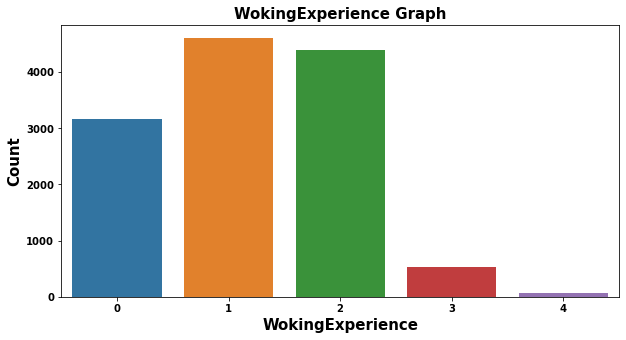

In [39]:
plt.figure(figsize=(10,5))

sns.barplot(x=job_df['WorkingExperience'].value_counts().index, 
            y=job_df['WorkingExperience'].value_counts());

plt.title('WokingExperience Graph', fontdict={'fontsize': 15}, fontweight='bold')
plt.xlabel('WokingExperience', fontdict={'fontsize': 15}, fontweight='bold')
plt.ylabel('Count', fontdict={'fontsize': 15}, fontweight='bold')

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()


In [40]:
job_df['WorkingExperience'].describe()

count    12761.000000
mean         1.194107
std          0.875574
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: WorkingExperience, dtype: float64

# Qualification

In [41]:
job_df['Qualification'].unique()

array(['High School or equivalent', "Bachelor's Degree",
       "Master's Degree", 'Phd Degree', 'Associate Degree',
       'No preference', 'Zero(0)', 'Others', 'Professional Degree',
       'University degree in banking', 'University degree',
       'The person minimum bachelor degree HR/management',
       'Technical school/institute graduate (preferably electrical or mechanical)',
       'University degree with knowledge',
       'មានកម្រិតវប្បធម៌ចាប់ពីបរិញ្ញាបត្រឡើងទៅ',
       'មានកម្រិតវប្បធម៌ចាប់ពីថ្នាក់ទី ៩ ឡើងទៅ',
       'មានកម្រិតវប្បធម៌ចាប់ពីថ្នាក់ទី ០៩ ឡើងទៅ',
       'ថ្នាក់បរិញ្ញាបត្រ ទាំងកំពុងសិក្សា និងបញ្ជប់',
       'University students or fresh graduates', 'University',
       'កំពុងសិក្សា ឬ គ្រោងនឹងបញ្ចប់ថ្នាក់បរិញ្ញាប័ត្រ',
       'Undergraduate Degree in a related field',
       'បរិញ្ញាបត្រផ្នែកទីផ្សារ ឬជំនាញដែលពាក់ពន្ធ័',
       'បញ្ចប់ថ្នាក់បរិញ្ញាបត្រ ឬជានិសិ្សតឆ្នាំទី៤', 'University Decree',
       '高中及以上', 'ត្រូវបានបញ្ចប់ថ្នាក់ទី១២',
       'Minimum 1 year of 

In [42]:
job_df['Qualification'] = job_df['Qualification'].replace({
    'High School or equivalent': 'BacII',
    "Bachelor's Degree": "Bachelor",
    "Master's Degree": "Master", 
    'Phd Degree': "PhD", 
    'Associate Degree': 'Associate',
    'No preference': 'No Preference', 
    'Zero(0)': 'No Preference', 
    'Others': 'Others', 
    'Professional Degree':'Professional',
    'University degree in banking':'Banking Degree',
    'University degree':'Bachelor',
    'The person minimum bachelor degree HR/management':'HR',
    'Technical school/institute graduate (preferably electrical or mechanical)':'Technical',
    'University degree with knowledge':'Bachelor',
    'មានកម្រិតវប្បធម៌ចាប់ពីបរិញ្ញាបត្រឡើងទៅ':'Bachelor',
    'មានកម្រិតវប្បធម៌ចាប់ពីថ្នាក់ទី ៩ ឡើងទៅ':'Diploma',
    'ត្រូវបានបញ្ចប់ថ្នាក់ទី១២':'BacII',
    'មានកម្រិតវប្បធម៌ចាប់ពីថ្នាក់ទី ០៩ ឡើងទៅ':'Diplome',
    'ថ្នាក់បរិញ្ញាបត្រ ទាំងកំពុងសិក្សា និងបញ្ជប់':'Bachelor',
    'University students or fresh graduates':'Bachelor',
    'University':'Bachelor', 
    'កំពុងសិក្សា ឬ គ្រោងនឹងបញ្ចប់ថ្នាក់បរិញ្ញាប័ត្រ':'BacII',
    'Undergraduate Degree in a related field':'Undergraduate Degree',
    'ចំនេះដឹងចប់ថ្នាក់ទី៩ឡើងទៅ': 'Diploma',
    'បញ្ចប់ថ្នាក់បរិញ្ញាបត្រ ឬជានិសិ្សតឆ្នាំទី៤':'Bachelor',
    'University Decree':'Bachelor',
    '高中及以上':'BacII',
    'Minimum 1 year of experience in assisting children':'takecarechildren',
    'Vocation Training': 'Training',
    'Certificate (Diploma)':'Diploma',
    'Diplome': 'Diploma',
    'បរិញ្ញាបត្រផ្នែកទីផ្សារ ឬជំនាញដែលពាក់ពន្ធ័': 'Bachelor'
})


/var/folders/q8/hh28k3x136l2jzb52rdfpgph0000gn/T/ipykernel_3459/3828139068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_df['Qualification'] = job_df['Qualification'].replace({


In [43]:
job_df.head(2)

,JobTitle,CompanyName,Category,Salary,JobType,JobFunction,PositionLevel,WorkingDay,Location,WorkingExperience,Qualification,Age
0,Sous Chef,Jobs.PhnomList & Business Training Center,Human Resource / Recruitment,Negotiable,Full Time,General Work,Senior Executive,6-day work/week,Phnom Penh,1,BacII,18 - 50
1,Assistant Admin & Acc,Eco Elictric (Pickup & Maman),Electrical and Electronics,Negotiable,Full Time,Clerical/Administrative,Junior Executive,6-day work/week,Phnom Penh,0,Bachelor,18 - 50


In [44]:
job_df['Qualification'].value_counts().sort_index()

Associate                700
BacII                   1638
Bachelor                9927
Banking Degree             1
Diploma                   58
Diplome                    1
HR                         1
Master                   102
No Preference            250
Others                    53
PhD                       13
Professional               3
Technical                  1
Training                  11
Undergraduate Degree       1
takecarechildren           1
Name: Qualification, dtype: int64

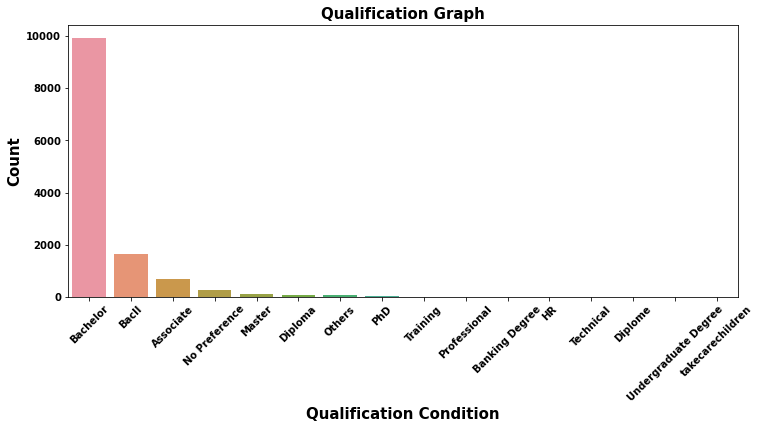

In [45]:
plt.figure(figsize=(12, 5))
sns.barplot(
    x=job_df['Qualification'].value_counts().index, 
    y=job_df['Qualification'].value_counts(),
);

plt.title('Qualification Graph', fontdict={'fontsize': 15}, fontweight='bold')
plt.xlabel('Qualification Condition', fontdict={'fontsize': 15}, fontweight='bold')
plt.ylabel('Count', fontdict={'fontsize': 15}, fontweight='bold')

plt.xticks(rotation=45, fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

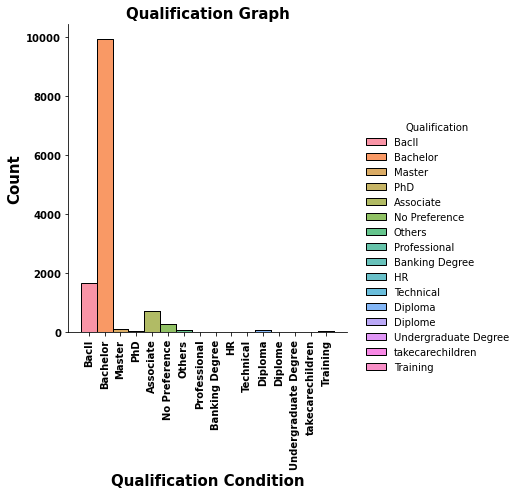

In [46]:
sns.displot(
    data=job_df,
    x='Qualification',
    multiple='stack',
    hue='Qualification'
);

plt.title('Qualification Graph', fontdict={'fontsize': 15}, fontweight='bold')
plt.xlabel('Qualification Condition', fontdict={'fontsize': 15}, fontweight='bold')
plt.ylabel('Count', fontdict={'fontsize': 15}, fontweight='bold')

plt.xticks(rotation=90, fontweight='bold')
plt.yticks(fontweight='bold')

plt.show() 

# Location

In [47]:
job_df['Location'].size

12761

In [48]:
job_df['Location'].unique()

array(['Phnom Penh', 'Poipet', 'Bavet', 'Preah Sihanouk', 'Kandal',
       'Siem Reap', 'Kampong Cham', 'Kampot', 'Pailin', 'Kratie',
       'Battambang', 'Prey Veng', 'Kampong Speu', 'Kampong Thom',
       'Banteay Meanchey', 'Koh Kong', 'Preah Vihear', 'Oddor Meanchey',
       'Kampong Chhnang', 'Banlung', 'Stung Treng', 'Japan', 'Svay Rieng',
       'Tbong Khmum', 'Takeo', 'Kep', 'Pursat', 'Rattanakiri',
       'United Arab Emirates', 'Takhmao', 'Mondulkiri', 'Cambodia'],
      dtype=object)

In [49]:
job_df['Location'].value_counts()

Phnom Penh              10677
Siem Reap                 435
Preah Sihanouk            387
Kandal                    176
Battambang                162
Kampot                    154
Kampong Speu              121
Kampong Cham              105
Svay Rieng                 87
Bavet                      85
Banteay Meanchey           78
Poipet                     77
Koh Kong                   31
Kratie                     29
Kampong Thom               22
Oddor Meanchey             19
Prey Veng                  17
Kampong Chhnang            14
Takeo                      14
Pursat                     13
Preah Vihear               10
Takhmao                     9
Mondulkiri                  8
Tbong Khmum                 6
Cambodia                    5
Kep                         4
Pailin                      4
Rattanakiri                 4
Stung Treng                 3
Japan                       2
Banlung                     2
United Arab Emirates        1
Name: Location, dtype: int64

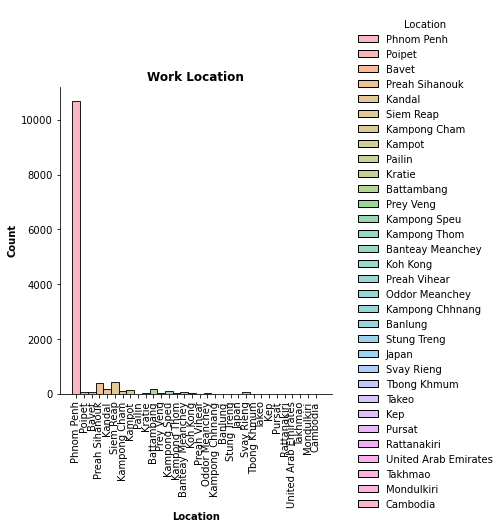

In [50]:
sns.displot(
    data=job_df,
    x='Location',
    hue='Location'
);
plt.title('Work Location', fontweight='bold')
plt.xlabel('Location', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks(rotation=90)
plt.show();

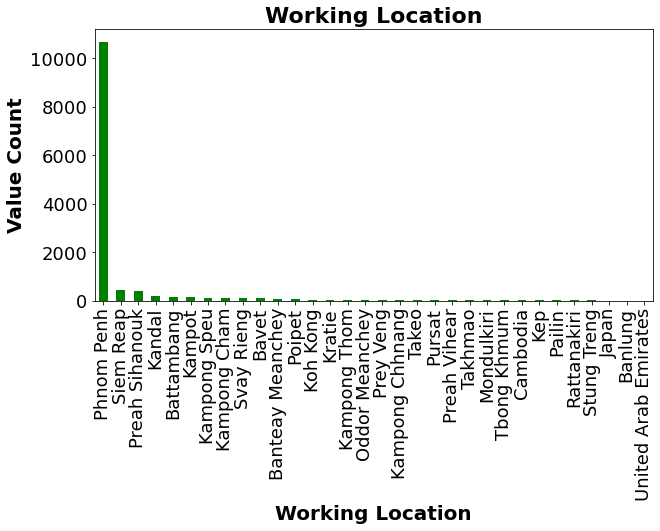

In [51]:
plt.figure(figsize=(10, 5))

job_df['Location'].value_counts().plot(
    kind='bar',
    x='Location',
    color='green'
)

plt.title('Working Location', fontsize=22, fontweight='bold')
plt.xlabel('Working Location', fontsize=20, fontweight='bold')
plt.ylabel('Value Count', fontsize=20, fontweight='bold')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

In [52]:
job_df['Location'].describe(include=['object'])

count          12761
unique            32
top       Phnom Penh
freq           10677
Name: Location, dtype: object

# WorkingDay

In [53]:
job_df.head(2)

,JobTitle,CompanyName,Category,Salary,JobType,JobFunction,PositionLevel,WorkingDay,Location,WorkingExperience,Qualification,Age
0,Sous Chef,Jobs.PhnomList & Business Training Center,Human Resource / Recruitment,Negotiable,Full Time,General Work,Senior Executive,6-day work/week,Phnom Penh,1,BacII,18 - 50
1,Assistant Admin & Acc,Eco Elictric (Pickup & Maman),Electrical and Electronics,Negotiable,Full Time,Clerical/Administrative,Junior Executive,6-day work/week,Phnom Penh,0,Bachelor,18 - 50


In [54]:
job_df['WorkingDay'].unique()

array(['6-day work/week', nan, '5 (1/2)-day work/week', '5-day work/week',
       '1-day work/week'], dtype=object)

In [55]:
job_df['WorkingDay'].value_counts()

1-day work/week          46
6-day work/week           7
5 (1/2)-day work/week     7
5-day work/week           3
Name: WorkingDay, dtype: int64

#### Replace Values
```python
'1-day work/week': 1
'6-day work/week': 6
'5 (1/2)-day work/week': 5+0.5
'5-day work/week': 5
```

In [56]:
job_df['WorkingDay'] = job_df['WorkingDay'].replace({
    '1-day work/week': 1,
    '6-day work/week': 6,
    '5 (1/2)-day work/week': 5+0.5,
    '5-day work/week': 5
})

/var/folders/q8/hh28k3x136l2jzb52rdfpgph0000gn/T/ipykernel_3459/146138546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_df['WorkingDay'] = job_df['WorkingDay'].replace({


In [57]:
job_df['WorkingDay'].head(5)

0    6.0
1    6.0
2    NaN
3    NaN
4    NaN
Name: WorkingDay, dtype: float64

In [58]:
job_df['WorkingDay'].value_counts()

1.0    46
6.0     7
5.5     7
5.0     3
Name: WorkingDay, dtype: int64

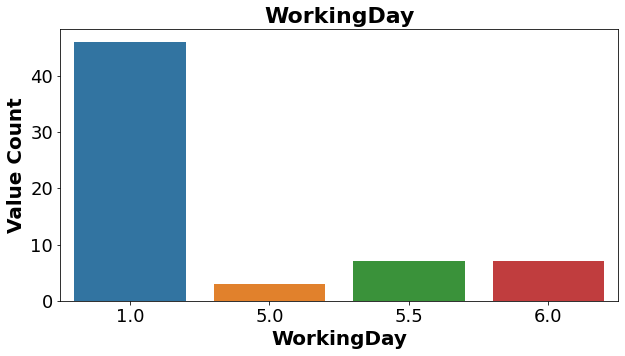

In [59]:
plt.figure(figsize=(10,5))

sns.barplot(
    x=job_df['WorkingDay'].value_counts().index, 
    y=job_df['WorkingDay'].value_counts()
);

plt.title('WorkingDay', fontsize=22, fontweight='bold')
plt.xlabel('WorkingDay', fontsize=20, fontweight='bold')
plt.ylabel('Value Count', fontsize=20, fontweight='bold')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show();

In [60]:
job_df.head()

,JobTitle,CompanyName,Category,Salary,JobType,JobFunction,PositionLevel,WorkingDay,Location,WorkingExperience,Qualification,Age
0,Sous Chef,Jobs.PhnomList & Business Training Center,Human Resource / Recruitment,Negotiable,Full Time,General Work,Senior Executive,6.0,Phnom Penh,1,BacII,18 - 50
1,Assistant Admin & Acc,Eco Elictric (Pickup & Maman),Electrical and Electronics,Negotiable,Full Time,Clerical/Administrative,Junior Executive,6.0,Phnom Penh,0,Bachelor,18 - 50
2,Accountant / Stock Controller,Meng Dy Europegas,Automotive / Vehicle,Negotiable,Full Time,General/Cost Accounting,Fresh/Entry Level,NaN,Phnom Penh,1,Bachelor,18 - 28
3,Tax Accountant (Urgent),LIM & TAN Business Solutions.,Human Resource / Recruitment,Negotiable,Full Time,Audit and Taxation,Non-Executive,NaN,Phnom Penh,2,Bachelor,18 - 50
4,Account officer,"Thai huot Trading Co,. Ltd",Food and Berverage,Negotiable,Full Time,General/Cost Accounting,Non-Executive,NaN,Phnom Penh,1,Bachelor,18 - 50


In [61]:
job_df["WorkingDay"].describe(include='object')

count    63.000000
mean      2.246032
std       2.074952
min       1.000000
25%       1.000000
50%       1.000000
75%       5.000000
max       6.000000
Name: WorkingDay, dtype: float64

# Position Level

```python
* List from low to high class
0: Kindergarten/pre-k
1: Non-Executive
2: Fresh/Entry Level
3: Junior Executive
4: Manager
5: Senior Manager
6: Senior Executive
```

In [62]:
job_df['PositionLevel'].value_counts()

Junior Executive      6751
Non-Executive         3843
Senior Executive      1310
Fresh/Entry Level      485
Senior Manager         338
Manager                 33
Kindergarten/pre-k       1
Name: PositionLevel, dtype: int64

In [63]:
for i in job_df['PositionLevel'].unique():
    print(i)

Senior Executive
Junior Executive
Fresh/Entry Level
Non-Executive
Manager
Kindergarten/pre-k
Senior Manager


In [64]:
job_df['PositionLevel'].describe()

count                12761
unique                   7
top       Junior Executive
freq                  6751
Name: PositionLevel, dtype: object

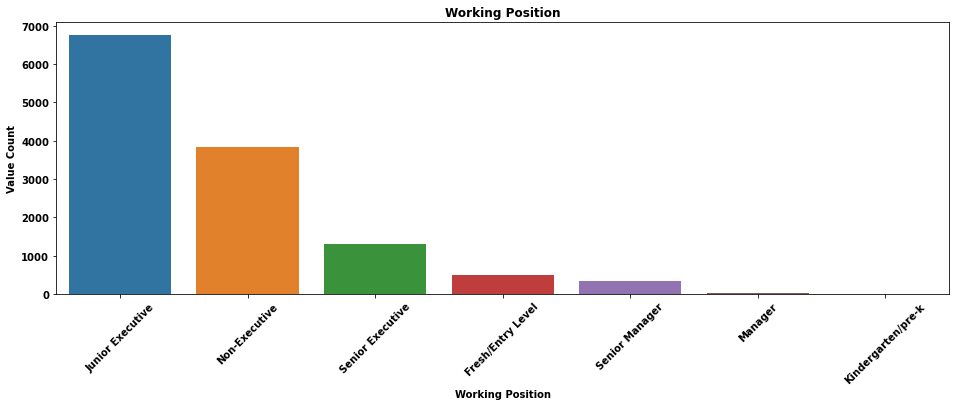

In [65]:
plt.figure(figsize=(16,5))

sns.barplot(
    x=job_df['PositionLevel'].value_counts().index,
    y=job_df['PositionLevel'].value_counts()
);

plt.title('Working Position', fontweight='bold')
plt.xlabel('Working Position', fontweight='bold')
plt.ylabel('Value Count', fontweight='bold')

plt.xticks(rotation=45, fontweight='bold')
plt.yticks(fontweight='bold')

plt.show();

In [66]:
job_df.describe(include=['object', 'int', 'float'])

,JobTitle,CompanyName,Category,Salary,JobType,JobFunction,PositionLevel,WorkingDay,Location,WorkingExperience,Qualification,Age
count,12761,12761,12761,12761,12761,12761,12761,63.000000,12761,12761.000000,12761,12761
unique,8976,2647,44,7,8,134,7,NaN,32,NaN,16,170
top,Accountant,CDL-HR,General Business,Negotiable,Full Time,Top Management,Junior Executive,NaN,Phnom Penh,NaN,Bachelor,18 - 50
freq,165,171,1394,11292,12585,2486,6751,NaN,10677,NaN,9927,9047
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.246032,NaN,1.194107,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.074952,NaN,0.875574,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,2.000000,NaN,NaN


# Age

### ***min_age column***

In [67]:
job_df['Age'].unique()

array(['18 - 50', '18 - 28', '22 - 35', '20 - 50', '20 - 40', '18 - 40',
       '25 - 45', '18 - 25', '18 - 45', '30 - 50', '18 - 30', '25 - 40',
       '18 - 35', '20 - 60', '24- 32', '20 - 24', '25 - 35', '30 - 45',
       '20 - 25', '27 - 45', '20 - 30', '20 - 35', '23 - 35', '22 - 55',
       '22 - 50', '21 - 45', '23 - 45', '25 - 50', '27 - 37', '25 - 37',
       '22 - 38', '24 - 38', '20 - 34', '21 - 35', '22 - 30', '25 - 55',
       '25 - 32', '18 - 65', '22 - 40', '23 - 30', '20 - 45', '27  - 50',
       '30  - 50', '15 - 25', '19 - 35', '22 - 45', '18 - 22', '22 - 27',
       '19 - 30', '25 - 30', '18 - 24', '28 - 45', '28 - 40', '18 - 33',
       '30 - 40', '20 - 28', '18 - 26', '21 - 32', '20 - 27', '35 - 55',
       '23 - 50', '18 - 27', '27 - 35', '21 - 30', '19 - 50', '26 - 35',
       '19 - 40', '24 - 40', '18 - 38', '23 - 40', '21 - 59', '20 - 33',
       '18 - 60', '22 - 28', '18 - 32', '22 - 32', '23 - 29', '21 - 29',
       '35 - 45', '18 - 57', '28 - 35', '18 - 34',

In [68]:
job_df[['min_age', 'max_age']] = job_df['Age'].str.split(' - ', expand=True)
job_df.drop('Age', axis='columns', inplace = True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [69]:
job_df[['min_age', 'max_age']].tail(10)

,min_age,max_age
13788,18,50
13789,18,50
13790,18,50
13791,18,40
13792,18,50
13793,18,45
13795,18,50
13796,18,50
13797,18,50
13798,25,35


In [70]:
job_df['min_age'].unique()

array(['18', '22', '20', '25', '30', '24- 32', '27', '23', '21', '24',
       '27 ', '30 ', '15', '19', '28', '35', '26', '29', '40', 'Feb-35',
       '16', '20 -', '19 -', '17', '32', '33', '22 -35', '-0'],
      dtype=object)

In [71]:
job_df['min_age'] = job_df['min_age'] \
.replace({
    '24- 32': '24', 
    '27 ': '27', 
    '30 ': '30', 
    'Feb-35': '35',
    '20 -': '20', 
    '19 -': '19', 
    '22 -35': '22', 
    '-0': '20'
})

/var/folders/q8/hh28k3x136l2jzb52rdfpgph0000gn/T/ipykernel_3459/320593537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_df['min_age'] = job_df['min_age'] \


In [72]:
job_df['min_age'].unique()

array(['18', '22', '20', '25', '30', '24', '27', '23', '21', '15', '19',
       '28', '35', '26', '29', '40', '16', '17', '32', '33'], dtype=object)

In [73]:
# change values of min_age to numeric
job_df['min_age'] = pd.to_numeric(job_df['min_age'])

/var/folders/q8/hh28k3x136l2jzb52rdfpgph0000gn/T/ipykernel_3459/2764139209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_df['min_age'] = pd.to_numeric(job_df['min_age'])


In [74]:
job_df['min_age'].unique()

array([18, 22, 20, 25, 30, 24, 27, 23, 21, 15, 19, 28, 35, 26, 29, 40, 16,
       17, 32, 33])

### ***max_age***

In [75]:
job_df['max_age'].unique()

array(['50', '28', '35', '40', '45', '25', '30', '60', None, '24', '55',
       '37', '38', '34', '32', '65', '22', '27', '33', '26', '59', '29',
       '57', '48', '36', '49', '39', '44', '70', '95', '43'], dtype=object)

In [76]:
job_df['max_age'].unique()

array(['50', '28', '35', '40', '45', '25', '30', '60', None, '24', '55',
       '37', '38', '34', '32', '65', '22', '27', '33', '26', '59', '29',
       '57', '48', '36', '49', '39', '44', '70', '95', '43'], dtype=object)

In [77]:
job_df['max_age'] = job_df['max_age'].fillna('50')

/var/folders/q8/hh28k3x136l2jzb52rdfpgph0000gn/T/ipykernel_3459/3816331563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_df['max_age'] = job_df['max_age'].fillna('50')


In [78]:
job_df['max_age'] = pd.to_numeric(job_df['max_age'])

/var/folders/q8/hh28k3x136l2jzb52rdfpgph0000gn/T/ipykernel_3459/2355532351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_df['max_age'] = pd.to_numeric(job_df['max_age'])


In [79]:
job_df.head()

,JobTitle,CompanyName,Category,Salary,JobType,JobFunction,PositionLevel,WorkingDay,Location,WorkingExperience,Qualification,min_age,max_age
0,Sous Chef,Jobs.PhnomList & Business Training Center,Human Resource / Recruitment,Negotiable,Full Time,General Work,Senior Executive,6.0,Phnom Penh,1,BacII,18,50
1,Assistant Admin & Acc,Eco Elictric (Pickup & Maman),Electrical and Electronics,Negotiable,Full Time,Clerical/Administrative,Junior Executive,6.0,Phnom Penh,0,Bachelor,18,50
2,Accountant / Stock Controller,Meng Dy Europegas,Automotive / Vehicle,Negotiable,Full Time,General/Cost Accounting,Fresh/Entry Level,NaN,Phnom Penh,1,Bachelor,18,28
3,Tax Accountant (Urgent),LIM & TAN Business Solutions.,Human Resource / Recruitment,Negotiable,Full Time,Audit and Taxation,Non-Executive,NaN,Phnom Penh,2,Bachelor,18,50
4,Account officer,"Thai huot Trading Co,. Ltd",Food and Berverage,Negotiable,Full Time,General/Cost Accounting,Non-Executive,NaN,Phnom Penh,1,Bachelor,18,50


In [80]:
job_df['max_age'].unique()

array([50, 28, 35, 40, 45, 25, 30, 60, 24, 55, 37, 38, 34, 32, 65, 22, 27,
       33, 26, 59, 29, 57, 48, 36, 49, 39, 44, 70, 95, 43])

### Plotting min_age & max_age

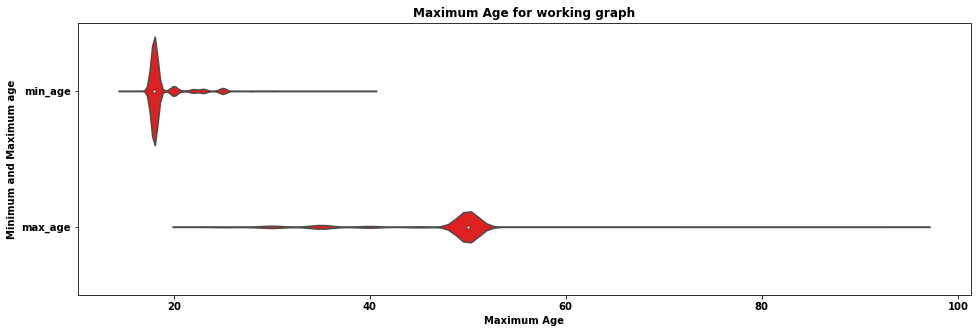

In [81]:
plt.figure(figsize=(16, 5))
sns.violinplot(data=job_df[['min_age', 'max_age']], split=True, color='r', orient='h')

plt.title('Maximum Age for working graph', fontweight='bold')
plt.xlabel('Maximum Age', fontweight='bold')
plt.ylabel('Minimum and Maximum age', fontweight='bold')

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

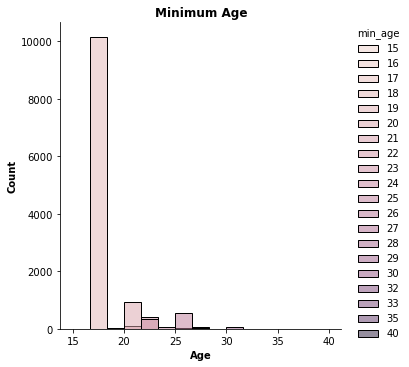

In [82]:
# Minimum age plotting
sns.displot(
    data=job_df,
    x='min_age',
    hue='min_age'
)

plt.title('Minimum Age', fontweight='bold')
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Count', fontweight='bold')

plt.show();

In [83]:
job_df.query("min_age == 15 or min_age == 16 or min_age == 17 or min_age == 18").iloc[:]

,JobTitle,CompanyName,Category,Salary,JobType,JobFunction,PositionLevel,WorkingDay,Location,WorkingExperience,Qualification,min_age,max_age
0,Sous Chef,Jobs.PhnomList & Business Training Center,Human Resource / Recruitment,Negotiable,Full Time,General Work,Senior Executive,6.0,Phnom Penh,1,BacII,18,50
1,Assistant Admin & Acc,Eco Elictric (Pickup & Maman),Electrical and Electronics,Negotiable,Full Time,Clerical/Administrative,Junior Executive,6.0,Phnom Penh,0,Bachelor,18,50
2,Accountant / Stock Controller,Meng Dy Europegas,Automotive / Vehicle,Negotiable,Full Time,General/Cost Accounting,Fresh/Entry Level,NaN,Phnom Penh,1,Bachelor,18,28
3,Tax Accountant (Urgent),LIM & TAN Business Solutions.,Human Resource / Recruitment,Negotiable,Full Time,Audit and Taxation,Non-Executive,NaN,Phnom Penh,2,Bachelor,18,50
4,Account officer,"Thai huot Trading Co,. Ltd",Food and Berverage,Negotiable,Full Time,General/Cost Accounting,Non-Executive,NaN,Phnom Penh,1,Bachelor,18,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13792,2920_Sale Support Department,CamUP Job Agency,Human Resource / Recruitment,Negotiable,Full Time,Marketing/Business Development,Junior Executive,NaN,Phnom Penh,2,Bachelor,18,50
13793,Driverជាច្រើននាក់ (ម្ដុំប៉ុសិ៍លេខច៣),ASEAN JOBS COMMUNITY ORGANIZATION ( ASEAN JOBS ),NGO / Non Profit / Social Service,$201 - $500 USD,Full Time,Driver,Junior Executive,NaN,Phnom Penh,1,BacII,18,45
13795,Japanese Desk Consultant ($500-$1500),"HRINC (Cambodia) Co., Ltd",Human Resource / Recruitment,$501 - $1000 USD,Full Time,Clerical/Administrative,Junior Executive,NaN,Phnom Penh,2,Bachelor,18,50
13796,Office Clark/Accountant,Por Long Paper Industry,Manufacturing / Production,Negotiable,Full Time,Top Management,Junior Executive,NaN,Phnom Penh,2,Bachelor,18,50


In [84]:
job_df.query("min_age > 18").iloc[:]

,JobTitle,CompanyName,Category,Salary,JobType,JobFunction,PositionLevel,WorkingDay,Location,WorkingExperience,Qualification,min_age,max_age
12,Sale out door (Urgent),"Phnom Penh Media Co., Ltd.",Advertising / PR / Events,Negotiable,Full Time,Retail Sales/General,Junior Executive,NaN,Phnom Penh,1,Bachelor,22,35
14,Accountant Supervisor/Manager,"ELEVEN 11 PP CO., LTD",General Business,Negotiable,Full Time,General/Cost Accounting,Manager,5.5,Phnom Penh,2,Bachelor,20,50
15,Internal Audit Supervisor,"ELEVEN 11 PP CO., LTD",General Business,Negotiable,Full Time,Audit and Taxation,Senior Executive,5.5,Phnom Penh,2,Bachelor,20,50
16,Senior Accountant,"ELEVEN 11 PP CO., LTD",General Business,Negotiable,Full Time,General/Cost Accounting,Senior Executive,5.5,Poipet,1,Bachelor,20,50
17,Senior Accountant/Supervisor,"ELEVEN 11 PP CO., LTD",General Business,Negotiable,Full Time,General/Cost Accounting,Senior Executive,5.5,Poipet,1,Bachelor,20,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13768,Deputy Legal & Compliance Manager at MFI($1000),"FORVAL (CAMBODIA) CO.,LTD (Japanese Consulting...",General Business,$501 - $1000 USD,Full Time,Customer Service,Senior Manager,NaN,Phnom Penh,2,Bachelor,25,35
13771,Sales & Marketing Assistant Manager(400$),"EBM Co., Ltd",Human Resource / Recruitment,$201 - $500 USD,Full Time,Sales-Corporate,Junior Executive,NaN,Phnom Penh,2,Bachelor,24,35
13782,IT Programming Officer,Borey Peng Huoth,Construction / Building / Architecture,Negotiable,Full Time,IT-Software,Junior Executive,NaN,Phnom Penh,1,Bachelor,22,40
13783,Account and Finance Manager Chinese speaking (...,"Cam S&V Trading Co.,Ltd ( S&V Cambodia Jobs )",Human Resource / Recruitment,$1001 - $1500 USD,Full Time,Top Management,Senior Manager,NaN,Phnom Penh,2,Bachelor,27,45


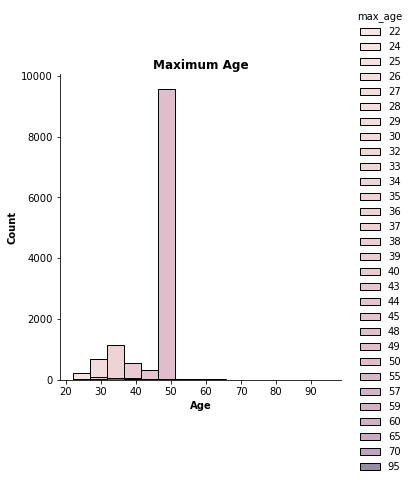

In [85]:
# Maximum age plotting
sns.displot(
    data=job_df,
    x='max_age',
    hue='max_age',
    color='Green'
)

plt.title('Maximum Age', fontweight='bold')
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Count', fontweight='bold')

plt.show();

In [86]:
job_df.query("max_age == 65").iloc[:]

,JobTitle,CompanyName,Category,Salary,JobType,JobFunction,PositionLevel,WorkingDay,Location,WorkingExperience,Qualification,min_age,max_age
383,AP Accountant (Based in Phnom Penh),Cambodia Beverage Company Ltd (Coca Cola),Food and Berverage,Negotiable,Full Time,Accounting,Fresh/Entry Level,NaN,Phnom Penh,2,Bachelor,18,65
384,AP Accountant (Based in Phnom Penh),Cambodia Beverage Company Ltd (Coca Cola),Food and Berverage,Negotiable,Full Time,Corporation Finance/Investment,Fresh/Entry Level,NaN,Phnom Penh,2,Bachelor,18,65
2512,Market Execution Executive (Sales Supervisor),Cambodia Beverage Company Ltd (Coca Cola),Food and Berverage,Negotiable,Full Time,Marketing/Business Development,Junior Executive,NaN,Battambang,1,Bachelor,18,65
2726,HR/ Admin Officer,Cambodia Beverage Company Ltd (Coca Cola),Food and Berverage,Negotiable,Full Time,Human Resource,Non-Executive,NaN,Phnom Penh,1,Bachelor,18,65
2727,Procurement Specialist,Cambodia Beverage Company Ltd (Coca Cola),Food and Berverage,Negotiable,Full Time,General Work,Junior Executive,NaN,Phnom Penh,1,Bachelor,18,65
2728,Sales Trainer,Cambodia Beverage Company Ltd (Coca Cola),Food and Berverage,Negotiable,Full Time,Sales-Corporate,Junior Executive,NaN,Battambang,1,Bachelor,18,65
2730,Finance Analyst - Commercial,Cambodia Beverage Company Ltd (Coca Cola),Food and Berverage,Negotiable,Full Time,Banking/Financial,Junior Executive,NaN,Phnom Penh,2,Bachelor,18,65
2732,Line Operator (Based in PPSEZ).,Cambodia Beverage Company Ltd (Coca Cola),Food and Berverage,Negotiable,Full Time,General Work,Non-Executive,NaN,Phnom Penh,1,Bachelor,18,65
4776,Area Sales Manager (Hold 3 Provinces: Mondulk...,Cambodia Beverage Company Ltd (Coca Cola),Food and Berverage,Negotiable,Full Time,Top Management,Senior Executive,NaN,Rattanakiri,2,Bachelor,18,65
4777,AP Accountant (Based in Phnom Penh),Cambodia Beverage Company Ltd (Coca Cola),Food and Berverage,Negotiable,Full Time,General/Cost Accounting,Junior Executive,NaN,Phnom Penh,2,Bachelor,18,65


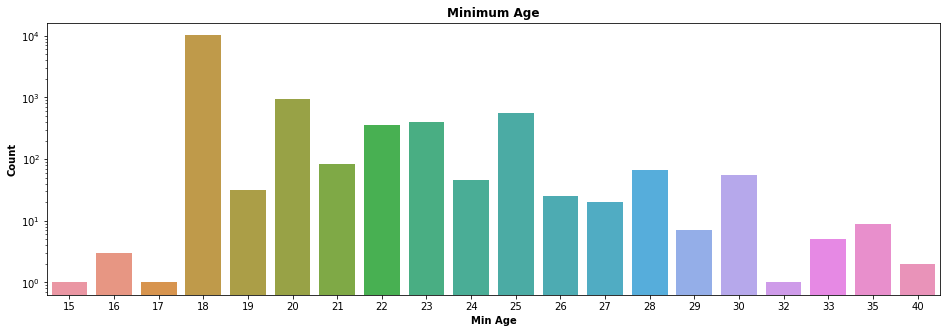

In [87]:
plt.figure(figsize=(16,5))

sns.barplot(
    x=job_df['min_age'].value_counts().index, 
    y=job_df['min_age'].value_counts());

plt.title('Minimum Age', fontweight='bold')
plt.xlabel("Min Age", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.yscale('log')
plt.show()

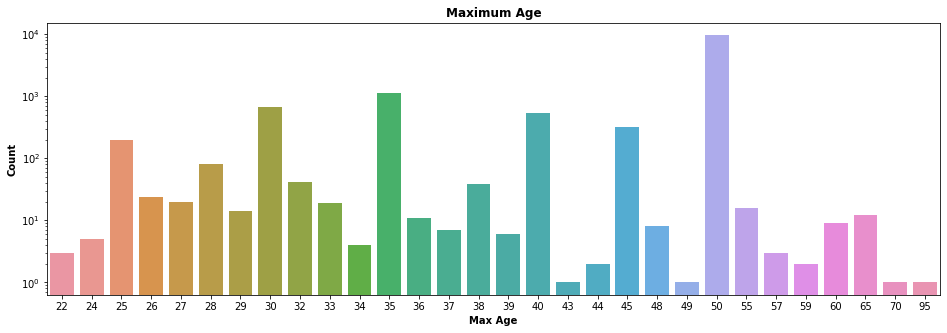

In [88]:
plt.figure(figsize=(16,5))
sns.barplot(
    x=job_df['max_age'].value_counts().index, 
    y=job_df['max_age'].value_counts());
plt.title('Maximum Age', fontweight='bold')
plt.xlabel("Max Age", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.yscale('log')
plt.show()

# JobFunction

In [89]:
job_df['JobFunction'].unique()

array(['General Work', 'Clerical/Administrative',
       'General/Cost Accounting', 'Audit and Taxation', 'Top Management',
       'Retail Sales/General', 'Sales-Corporate',
       'Corporation Finance/Investment', 'Marketing/Business Development',
       'Human Resource', 'Education', 'Food/Beverage/Restaurant',
       'Arts/Creative Design', 'Maintenance', 'Hotel/Tourism',
       'Secretarial', 'Customer Service', 'Hotel/Hospitality',
       'Accounting', 'Logistics/Supply Chain', 'Sales / Eng/Tech/IT',
       'Social and Consulting Service', 'Bank/Insurance',
       'Operation/Production', 'Manufacturing', 'Finance',
       'Architecture/Engineering', 'Others', 'Sales', 'IT',
       'Education/Training', 'Law/Legal Service', 'Nurse/Medical Support',
       'Project Management', 'Quality Control/Assurance',
       'Translation/Interpretation', 'Cashier/Receptionist',
       'Other Engineering', 'Technician/Maintenance',
       'Purchasing/Material Mgmt', 'Cook/Cleaner/Maid',
       '

In [90]:
job_df['JobFunction'].value_counts()

Top Management                                 2486
Customer Service                               1127
Sales-Corporate                                 825
Secretarial                                     797
General/Cost Accounting                         791
Retail Sales/General                            586
Clerical/Administrative                         537
Marketing/Business Development                  496
Banking/Financial                               449
Education                                       407
IT-Software                                     358
Logistics/Supply Chain                          320
Food/Beverage/Restaurant                        294
Arts/Creative Design                            271
Human Resource                                  201
IT-Network/Sys/DB Admin                         192
Hotel/Tourism                                   186
Architecture/Interior Design                    149
General Work                                    129
Quality Cont

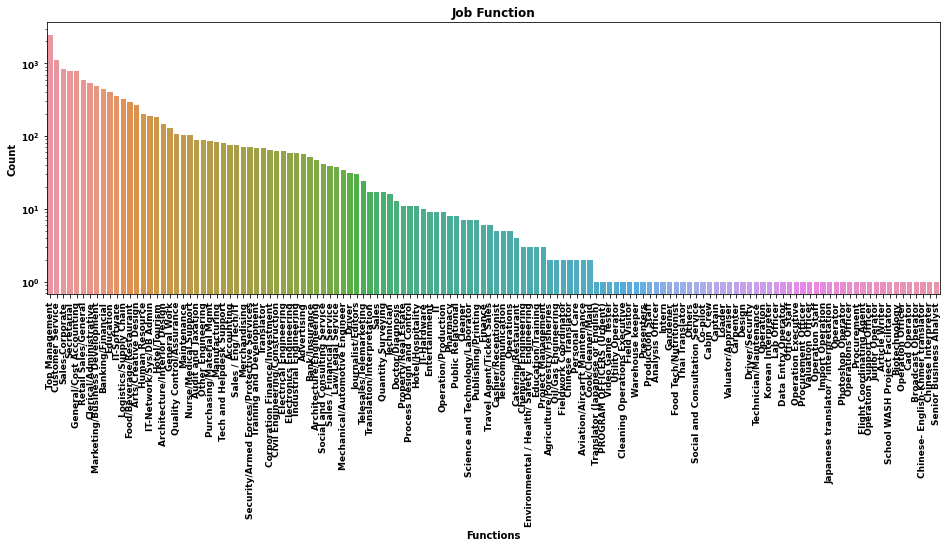

In [91]:
plt.figure(figsize=(16,5))
sns.barplot(
    x=job_df['JobFunction'].value_counts().index, 
    y=job_df['JobFunction'].value_counts()
);

plt.title('Job Function', fontweight='bold')
plt.xlabel("Functions", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.yscale('log')

plt.xticks(rotation=90, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')

plt.show()

In [92]:
job_df.head(2)

,JobTitle,CompanyName,Category,Salary,JobType,JobFunction,PositionLevel,WorkingDay,Location,WorkingExperience,Qualification,min_age,max_age
0,Sous Chef,Jobs.PhnomList & Business Training Center,Human Resource / Recruitment,Negotiable,Full Time,General Work,Senior Executive,6.0,Phnom Penh,1,BacII,18,50
1,Assistant Admin & Acc,Eco Elictric (Pickup & Maman),Electrical and Electronics,Negotiable,Full Time,Clerical/Administrative,Junior Executive,6.0,Phnom Penh,0,Bachelor,18,50


# JobType

In [93]:
job_df.JobType.unique()

array(['Full Time', 'Part Time', 'Temporary Contract',
       'Internship/Training', 'Internship', 'Contract', 'Temporary',
       'Full-Time'], dtype=object)

In [94]:
job_df.JobType.value_counts()

Full Time              12585
Part Time                109
Internship/Training       29
Temporary Contract        26
Contract                   5
Internship                 3
Full-Time                  3
Temporary                  1
Name: JobType, dtype: int64

In [95]:
job_df.JobType = job_df.JobType.replace('Full-Time', 'Full Time')

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [96]:
job_df.JobType.value_counts().index.sort_values()

Index(['Contract', 'Full Time', 'Internship', 'Internship/Training',
       'Part Time', 'Temporary', 'Temporary Contract'],
      dtype='object')

In [97]:
job_df.JobType.value_counts()

Full Time              12588
Part Time                109
Internship/Training       29
Temporary Contract        26
Contract                   5
Internship                 3
Temporary                  1
Name: JobType, dtype: int64

<Figure size 1440x360 with 0 Axes>

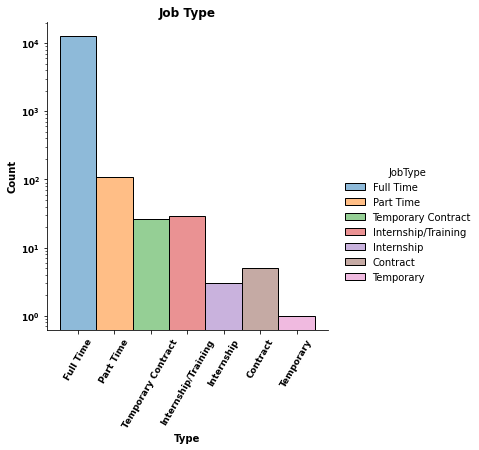

In [98]:
plt.figure(figsize=(20,5))
sns.displot(
    data=job_df,
    x='JobType',
    hue=job_df.JobType
);

plt.title('Job Type', fontweight='bold')
plt.xlabel("Type", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.yscale('log')

plt.xticks(rotation=60, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')

plt.show();

# Salary

In [99]:
job_df.Salary.value_counts()

Negotiable           11292
$201 - $500 USD        771
< $200 USD             268
$501 - $1000 USD       262
$1001 - $1500 USD      137
> $2000 USD             18
$1501 - $2000 USD       13
Name: Salary, dtype: int64

In [100]:
job_df.Salary.unique()

array(['Negotiable', '< $200 USD', '$501 - $1000 USD', '$201 - $500 USD',
       '$1001 - $1500 USD', '> $2000 USD', '$1501 - $2000 USD'],
      dtype=object)

In [101]:
job_df.Salary.describe()

count          12761
unique             7
top       Negotiable
freq           11292
Name: Salary, dtype: object

In [102]:
job_df.tail(10)

,JobTitle,CompanyName,Category,Salary,JobType,JobFunction,PositionLevel,WorkingDay,Location,WorkingExperience,Qualification,min_age,max_age
13788,Project Assistant,"EBM Co., Ltd",Human Resource / Recruitment,$201 - $500 USD,Full Time,Secretarial,Junior Executive,NaN,Phnom Penh,0,Bachelor,18,50
13789,Food & Beverage Supervisor (Night Shift),Legend Cinema,Entertainment,Negotiable,Full Time,Top Management,Non-Executive,NaN,Phnom Penh,1,Bachelor,18,50
13790,អ្នកបើកឡាន(ទួលស្វាយព្រៃ),ASEAN JOBS COMMUNITY ORGANIZATION ( ASEAN JOBS ),NGO / Non Profit / Social Service,$201 - $500 USD,Full Time,Driver,Junior Executive,NaN,Phnom Penh,1,BacII,18,50
13791,ចុងភៅ​(​ចេះធ្វើម្ហូបចិននិងខ្មែរ),ASEAN JOBS COMMUNITY ORGANIZATION ( ASEAN JOBS ),NGO / Non Profit / Social Service,$201 - $500 USD,Full Time,Food/Beverage/Restaurant,Junior Executive,NaN,Phnom Penh,1,BacII,18,40
13792,2920_Sale Support Department,CamUP Job Agency,Human Resource / Recruitment,Negotiable,Full Time,Marketing/Business Development,Junior Executive,NaN,Phnom Penh,2,Bachelor,18,50
13793,Driverជាច្រើននាក់ (ម្ដុំប៉ុសិ៍លេខច៣),ASEAN JOBS COMMUNITY ORGANIZATION ( ASEAN JOBS ),NGO / Non Profit / Social Service,$201 - $500 USD,Full Time,Driver,Junior Executive,NaN,Phnom Penh,1,BacII,18,45
13795,Japanese Desk Consultant ($500-$1500),"HRINC (Cambodia) Co., Ltd",Human Resource / Recruitment,$501 - $1000 USD,Full Time,Clerical/Administrative,Junior Executive,NaN,Phnom Penh,2,Bachelor,18,50
13796,Office Clark/Accountant,Por Long Paper Industry,Manufacturing / Production,Negotiable,Full Time,Top Management,Junior Executive,NaN,Phnom Penh,2,Bachelor,18,50
13797,Tax Accountant,"Garden City Glof Club Co., Ltd",Entertainment,Negotiable,Full Time,General/Cost Accounting,Junior Executive,NaN,Phnom Penh,2,Bachelor,18,50
13798,Accountant Manager ($300-$500),CDL-HR,Human Resource / Recruitment,$201 - $500 USD,Full Time,Clerical/Administrative,Senior Executive,NaN,Phnom Penh,2,Bachelor,25,35


In [103]:
sal_not_neg = job_df.query("Salary != 'Negotiable'").reset_index(drop=True)
sal_not_neg

,JobTitle,CompanyName,Category,Salary,JobType,JobFunction,PositionLevel,WorkingDay,Location,WorkingExperience,Qualification,min_age,max_age
0,Sale & Marketing ($160 - $200),Metfone Battambang Branch,Telecommunication,< $200 USD,Full Time,Retail Sales/General,Non-Executive,NaN,Phnom Penh,1,Bachelor,18,50
1,Female Foreign English Teacher Required,Grandview School,General Business,$501 - $1000 USD,Full Time,Education,Kindergarten/pre-k,5.0,Phnom Penh,1,Bachelor,18,50
2,អ្នកបើកបរ,Bonded Warehouse,Logistics / Transportation / Warehouse,$201 - $500 USD,Full Time,General Work,Fresh/Entry Level,NaN,Bavet,1,Professional,18,40
3,សន្តិសុខ ($200 ចចារ),Bonded Warehouse,Logistics / Transportation / Warehouse,$201 - $500 USD,Full Time,Logistics/Supply Chain,Fresh/Entry Level,NaN,Bavet,0,Others,18,40
4,Warehouse Worker ($150),Bonded Warehouse,Logistics / Transportation / Warehouse,$201 - $500 USD,Full Time,Logistics/Supply Chain,Fresh/Entry Level,NaN,Bavet,0,Others,18,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,អ្នកបើកឡាន(ទួលស្វាយព្រៃ),ASEAN JOBS COMMUNITY ORGANIZATION ( ASEAN JOBS ),NGO / Non Profit / Social Service,$201 - $500 USD,Full Time,Driver,Junior Executive,NaN,Phnom Penh,1,BacII,18,50
1465,ចុងភៅ​(​ចេះធ្វើម្ហូបចិននិងខ្មែរ),ASEAN JOBS COMMUNITY ORGANIZATION ( ASEAN JOBS ),NGO / Non Profit / Social Service,$201 - $500 USD,Full Time,Food/Beverage/Restaurant,Junior Executive,NaN,Phnom Penh,1,BacII,18,40
1466,Driverជាច្រើននាក់ (ម្ដុំប៉ុសិ៍លេខច៣),ASEAN JOBS COMMUNITY ORGANIZATION ( ASEAN JOBS ),NGO / Non Profit / Social Service,$201 - $500 USD,Full Time,Driver,Junior Executive,NaN,Phnom Penh,1,BacII,18,45
1467,Japanese Desk Consultant ($500-$1500),"HRINC (Cambodia) Co., Ltd",Human Resource / Recruitment,$501 - $1000 USD,Full Time,Clerical/Administrative,Junior Executive,NaN,Phnom Penh,2,Bachelor,18,50


In [104]:
sal_not_neg.shape

(1469, 13)

In [105]:
job_df.query("JobTitle == 'អ្នកបើកបរ'")

,JobTitle,CompanyName,Category,Salary,JobType,JobFunction,PositionLevel,WorkingDay,Location,WorkingExperience,Qualification,min_age,max_age
48,អ្នកបើកបរ,Bonded Warehouse,Logistics / Transportation / Warehouse,$201 - $500 USD,Full Time,General Work,Fresh/Entry Level,NaN,Bavet,1,Professional,18,40
630,អ្នកបើកបរ,Singha & Leo Beer,Manufacturing / Production,Negotiable,Full Time,General Work,Junior Executive,NaN,Phnom Penh,2,BacII,28,40
2530,អ្នកបើកបរ,China Sincerely Leather (Cambodia) Limited,Manufacturing / Production,Negotiable,Full Time,Logistics/Supply Chain,Non-Executive,NaN,Phnom Penh,1,BacII,18,50
2621,អ្នកបើកបរ,Global Action for Environment Awareness Plc,General Business,Negotiable,Full Time,Logistics/Supply Chain,Non-Executive,NaN,Banteay Meanchey,1,BacII,18,50
2904,អ្នកបើកបរ,"DTV Star Co., Ltd (Digi)",Telecommunication,Negotiable,Full Time,Logistics/Supply Chain,Junior Executive,NaN,Phnom Penh,2,BacII,18,50
8679,អ្នកបើកបរ,CAMBODIAN NICE SATELLITE TELEVISION STATION CO...,Telecommunication,Negotiable,Full Time,Logistics/Supply Chain,Non-Executive,NaN,Phnom Penh,0,Bachelor,18,50
8954,អ្នកបើកបរ,ដំណឹងជ្រើសរើសបុគ្គលិក,General Business,Negotiable,Full Time,Logistics/Supply Chain,Non-Executive,NaN,Phnom Penh,1,BacII,20,35
8976,អ្នកបើកបរ,"PHARMA PRODUCT MANUFACTURING CO., LTD. (PPM)",Health / Medical Care / Pharmaceutical,Negotiable,Full Time,Logistics/Supply Chain,Non-Executive,NaN,Phnom Penh,2,BacII,18,50
9750,អ្នកបើកបរ,"Rockrete (Cambodia) Co., Ltd",Engineering,Negotiable,Full Time,Logistics/Supply Chain,Non-Executive,NaN,Phnom Penh,2,Associate,18,50
9941,អ្នកបើកបរ,SIN VENG YU COFFEE COMPANY,Food and Berverage,Negotiable,Full Time,Logistics/Supply Chain,Non-Executive,NaN,Phnom Penh,2,BacII,25,40


In [106]:
job_df = job_df.rename(columns={
    'JobTitle': 'job_title',
    'CompanyName': 'company_name',
    'Category': 'category',
    'Salary': 'salary',
    'JobType': 'job_type',
    'JobFunction': 'job_func',
    'PositionLevel': 'position_lvl',
    'WorkingDay': 'work_day',
    'Location': 'loc',
    'WorkingExperience': 'work_exp',
    'Qualification': 'qualified',
})
job_df.head()

,job_title,company_name,category,salary,job_type,job_func,position_lvl,work_day,loc,work_exp,qualified,min_age,max_age
0,Sous Chef,Jobs.PhnomList & Business Training Center,Human Resource / Recruitment,Negotiable,Full Time,General Work,Senior Executive,6.0,Phnom Penh,1,BacII,18,50
1,Assistant Admin & Acc,Eco Elictric (Pickup & Maman),Electrical and Electronics,Negotiable,Full Time,Clerical/Administrative,Junior Executive,6.0,Phnom Penh,0,Bachelor,18,50
2,Accountant / Stock Controller,Meng Dy Europegas,Automotive / Vehicle,Negotiable,Full Time,General/Cost Accounting,Fresh/Entry Level,NaN,Phnom Penh,1,Bachelor,18,28
3,Tax Accountant (Urgent),LIM & TAN Business Solutions.,Human Resource / Recruitment,Negotiable,Full Time,Audit and Taxation,Non-Executive,NaN,Phnom Penh,2,Bachelor,18,50
4,Account officer,"Thai huot Trading Co,. Ltd",Food and Berverage,Negotiable,Full Time,General/Cost Accounting,Non-Executive,NaN,Phnom Penh,1,Bachelor,18,50


In [107]:
job_df.category.unique()

array(['Human Resource / Recruitment', 'Electrical and Electronics',
       'Automotive / Vehicle', 'Food and Berverage',
       'Construction / Building / Architecture', 'Telecommunication',
       'Retail / Trading Distribution / Cosumer Products\xa0',
       'Entertainment', 'NGO / Non Profit / Social Service',
       'Advertising / PR / Events', 'General Business',
       'Hotel / Resort / Travel', 'Education / Training',
       'Information Technology\xa0/ Digital',
       'Health / Medical Care / Pharmaceutical',
       'Manufacturing / Production', 'Aerospace / Aviation',
       'Property / Real Estate', 'Logistics / Transportation / Warehouse',
       'Cosmetics & Beauty', 'Banking / Finance / Insurance / Investment',
       'Tourism', 'Clothing / Garment / Textile', 'Engineering',
       'Agriculture / Plantation', 'Accounting / Audit / Tax Firm',
       'Industrial Products', 'Legal Service / Consulting Firm',
       'Jewellery/Gems/Watches', 'Freight / Shipping',
       'Ene

In [108]:
job_df.category.value_counts()

General Business                                     1394
Hotel / Resort / Travel                              1385
Banking / Finance / Insurance / Investment           1282
Food and Berverage                                   1026
Retail / Trading Distribution / Cosumer Products      756
Construction / Building / Architecture                690
Manufacturing / Production                            683
Education / Training                                  627
Property / Real Estate                                589
Human Resource / Recruitment                          567
Information Technology / Digital                      497
Telecommunication                                     401
Logistics / Transportation / Warehouse                378
Electrical and Electronics                            372
Health / Medical Care / Pharmaceutical                363
NGO / Non Profit / Social Service                     331
Clothing / Garment / Textile                          208
Entertainment 

In [109]:
len(job_df.category.unique())

44

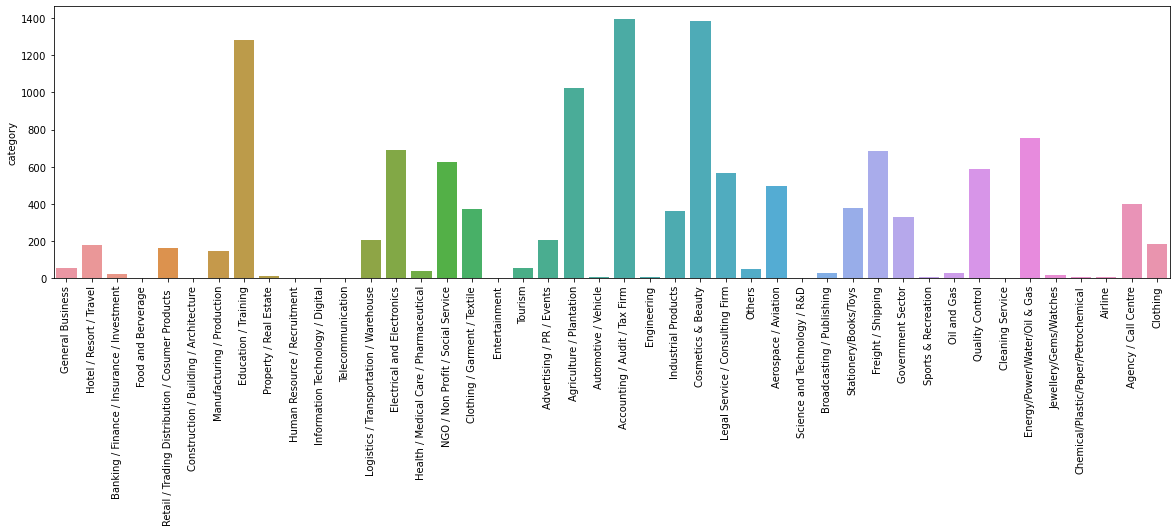

In [110]:
plt.figure(figsize=(20,5))

sns.barplot(
    x=job_df['category'].value_counts().index, 
    y=job_df['category'].value_counts().sort_index()
)

plt.xticks(rotation=90);

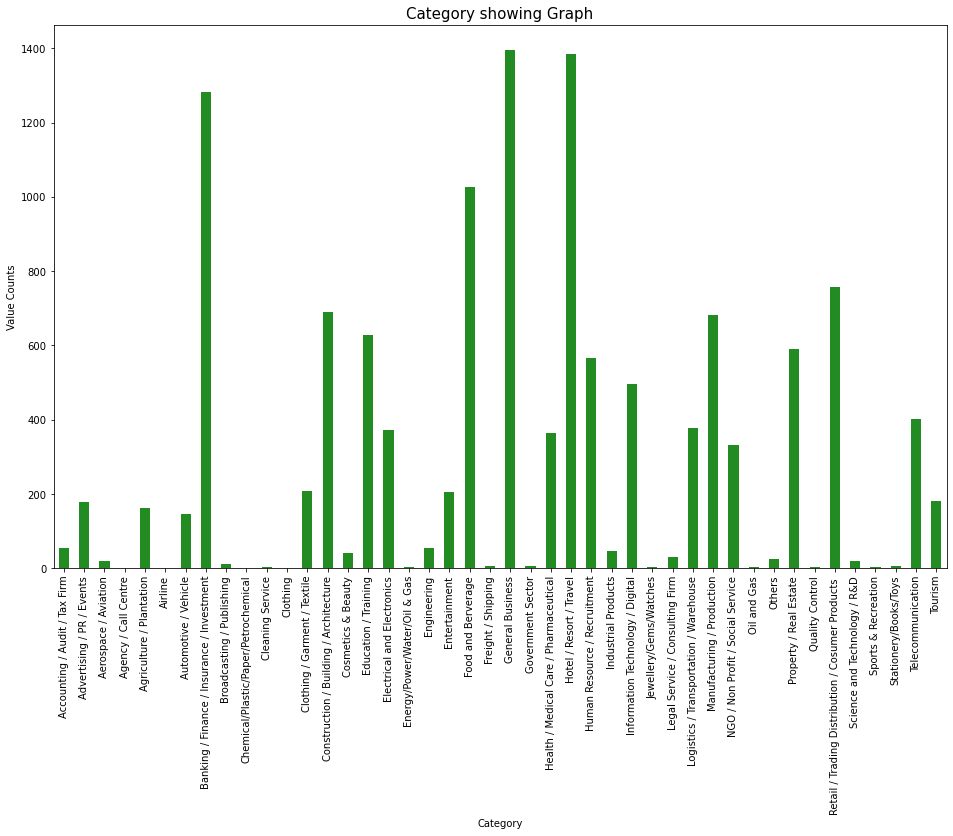

In [111]:
plt.figure(figsize=(16,10))

job_df['category'] \
    .value_counts(ascending=False) \
    .sort_index() \
    .plot \
    .bar(color='forestgreen')

plt.title('Category showing Graph', fontsize=15)
plt.xlabel('Category')
plt.ylabel('Value Counts')
plt.xticks(rotation=90)
plt.show()

# job_title 

In [112]:
for i,j in enumerate(job_df.job_title, start=0):
    print(i, j)

0 Sous Chef
1 Assistant Admin & Acc
2 Accountant / Stock Controller
3 Tax Accountant (Urgent)
4 Account officer
5 Sale and Marketing Manager (3% incentive)
6 Sale & Marketing ($160 - $200)
7 Sale Staff (Urgent)
8 Financial Accountant (1)
9 Marketing Officer
10 HR & Admin Executive (Urgent)
11 Sale Executive
12 Sale out door (Urgent)
13 Executive Assistant
14 Accountant Supervisor/Manager
15 Internal Audit Supervisor
16 Senior Accountant
17 Senior Accountant/Supervisor
18 Technician (MEP)
19 Female Foreign English Teacher Required
20 ត្រូវការអ្នកលក់ជាបន្ទាន់  Indoor/Outdoor Sales
21 Area Operational Manager/ Platform Manager
22 Sous Chef, Chef De Parties, Demi Chef, Commis
23 Account Assistant
24 Vice Principal (English Kindergarten & Young Learner Programs)
25 Account Executive
26 Admin staff (1 Position)
27 English to Khmer Subtitle Translators (Contract) & Two In-House Khmer ó Engli
28 Photoshop Operator
29 Sale Supervisor
30 Marketing Supervisor
31 Stock Controller
32 ជាងទឹក & ភ្លើង

803 Personal Assistant to Country Manager
804 Product Consultant
805 Driver 2
806 Driver 2 ( Big Truck )
807 Bartender (អ្នកធ្វើភេសជ្ជៈ) ភោជីយដ្ឋាន លី ឡាយ
808 Restaurant Supervisor (ភោជនីយដ្ឋាន លី ឡាយ)
809 អ្នកសម្អាត​ 5នាក់ Cleaner 5 (Ourresy Market)
810 Cleaner អ្នក​អនាម័យ 1 ( ភោជនីយដ្ឋាន លី ឡាយ)
811 Chef Assistant (ផ្នែកខ្វៃ ភោជីយដ្ឋាន លី ឡាយ)
812 Stock Controller (ភោជនីយដ្ឋាន លី ឡាយ)
813 Chef Assistant 02  (ភោជនីយដ្ឋាន លី ឡាយ)
814 ជាងជួសជុលរថយន្ត
815 Security Guard 16 សន្តីសុខ 16នាក់ (ផ្សារអូឬស្សី)
816 Accounting Manager
817 Tax Officer 1
818 Accounting Supervisor (ភោជនីយដ្ឋាន លី ឡាយ)
819 Accounting Supervisor
820 Accounting Supervisor 1 (Royal Hill at Ouddormeachey)
821 Finance Manager (01 position)
822 Order Entry (OE) (Tai Heng Industrial)
823 Internal Auditor (Phnom Penh) 02
824 Deputy Finance Manager
825 Deputy Accounting Manager 1
826 Sale Admin
827 Sale Account 3
828 Marketing Executive 1
829 Graphic Designer
830 Cashier at Orrussey Market (02 positions)
831 Accountant (Phnom

1302 MEP Site Engineer
1303 Planning Engineer
1304 Site Engineer
1305 Assistant Director in Sales and Makerting
1306 Sales Executive 2
1307 Merchandiser
1308 ផ្នែកលក់
1309 Air Ticketing
1310 Branch Manager (3 positions)
1311 Sale supervisor (Men)
1312 Call Center Manager (1 positions)
1313 Technical Support of Call Center​(អ្នកទទួលទូរស័ព្ទ)
1314 ភ្នាក់ងារចេញលក់តាមផ្ទះ (៩ រូប)
1315 អ្នកប្រមូលប្រាក់តាមផ្ទះ (2 positions)
1316 Supervisor Customer Service Back Office (1 positions)
1317 Technical Support Officer (5 positions)
1318 Corporate Sale Officer (3 positions)
1319 អ្នកបើកបរ និង អ្នកបើកតុកតុក (៧ រូប)
1320 Cook & Cleaner
1321 IT Developer
1322 អ្នកបើកបរម៉ូតូកង់បី១នាក់
1323 ជាងភ្លើង (ជាច្រើននាក់)
1324 Technical Drafter
1325 Interior Designer
1326 Accounts Payable Intern
1327 Front End Web Developer
1328 iOS/iPhone developer
1329 Site Engineer (1 Position)
1330 IT Technical Support (Urgently)
1331 Sales Officer (1 Position) ($300-$400)
1332 IT Programmer
1333 Internal Financial Auditor
1

1802 Accounting Manager
1803 Guest Service Assistant/Receptionist
1804 Account & Stock
1805 Sale Officer
1806 Public Relation Specialist (Marketing Communications)
1807 Accounting Supervisor
1808 Designer
1809 Engineering​ (ផ្លូវថ្នល់)
1810 Kitchen/Hotel assistant
1811 Night time reception ($150 - $180)
1812 Sous Chef
1813 Reservation officer
1814 Food & Beverage Manager
1815 ទីប្រឹក្សាសហគ្រិន
1816 Sales Officer, Card &Ebanking Product
1817 Staff of IT Server and Administrator
1818 Staff of IT Support
1819 Staff of IT Network and Infrastructure
1820 Operation Manager
1821 Credit Officer
1822 អ្នកបកប្រែភាសារចិន
1823 បុគ្គលិកដឹកជញ្ជូន បន្ទាន់
1824 Site Engineer
1825 Quantity Surveyor
1826 Draftsman
1827 Office Engineer
1828 Accountant
1829 Administrator
1830 Call Center Assistant, Front Office
1831 Front Office Supervisor
1832 Stewarding Supervisor
1833 Branch Manager (Cute Press and Oriental Princess)
1834 Duty Manager, Front Office
1835 Service / Waiter / Waitress
1836 Front Office / R

2302 GRAPHIC DESIGNER
2303 Credit Officer (1Post, Base in Phnom Penh)
2304 Graphic Design
2305 Marketing
2306 總務, Officer (會中文)
2307 Senior Accountant Urgent in PPSEZ 900-1200$
2308 Web Developer (Salary $170 - $250)
2309 Receptionist - Afternoon shift
2310 Head Chef
2311 មន្ត្រីឥណទានហាត់ការ
2312 Sale & Marketing (Urgent)
2313 Accountant Assistant, 1 position, Female
2314 Administrator
2315 Waiter or Waitress
2316 Tour Operator / Sales Executive
2317 Sales Officer
2318 Sales Admin
2319 មន្រ្តីឥណទាន (Credit Officer)($230-$350)
2320 Graphic Designer
2321 Internship
2322 ASSISTANT INBOUND TOUR OPERATOR
2323 中柬翻译人员Interpreter high salary 待遇优
2324 Receptionist 2 Persons
2325 Graphic Design or  Network (Salary: $200-$500)
2326 Receptionist and Administrative  USD 150-250
2327 Senior Accountant
2328 Accountant
2329 Interior Designer 2 post (Urgent)
2330 Sale and Marketing
2331 Customer Service Executive (2 positions)
2332 Sale ផ្នែកលក់ $180- $250
2333 ផ្នែកវិស្វករ​ (ផ្លូវថ្នល់)
2334 现场服务人员 (2

2802 Accounting Assistant *Urgent*
2803 Head Transfer Superior
2804 Quality Process Technician
2805 Corporate Social Responsibility Specialist
2806 QA Auditors x 2
2807 Accounting
2808 ជាងភ្លើង និងទឹក/Maintenance, អ្នកបើកទ្វារ
2809 អ្នករត់តុ Service
2810 បុគ្គលិកទទួលភ្ញៀវ (វេនព្រឹក, សៀល)
2811 Senior Officer, Legal
2812 Corporate Sales Officer (5 Positions)
2813 Recruitment Officer
2814 អ្នកបើកបរ
2815 Technical Support Officer
2816 Call Center Manager (1)
2817 Sales Manager
2818 Business Development Manager
2819 Sales & Marketing Executive
2820 បុគ្គលិកផ្នែកលក់ (Sales Executive)ចំនួន 5នាក់
2821 PA ( Personal Assistant)
2822 Management Trainee
2823 Warehouse Executive
2824 Sample Room Supervisor
2825 Purchasing Officer
2826 Payroll Officer
2827 Fixed Term Accounting
2828 Senior Marketing or Marketing Supervisor (Whiskey Distribution)
2829 Marketing Executive  (Whiskey Distribution)
2830 Sales and Marketing Manager
2831 IT Supervisor
2832 Admin Supervisor
2833 Teacher Assistant
2834 Compl

3301 Technician (Night-Shift)
3302 Store Manager (350$ - 500$) អ្នកគ្រប់គ្រងហាង
3303 Tour sale  & Marketing assistant ($300 -$600)
3304 Tour planning manager ($1000- $1500)
3305 Sale & Marketing Clark
3306 Secretary to President
3307 Sale Supervisor
3308 Sale Representatives
3309 Stock Controller
3310 បេឡាករ
3311 មន្រ្តីរដ្ឋបាល
3312 មន្រ្តីឥណទាន ចំនួន 40 នាក់
3313 Head Accountant
3314 receptionist (150$ - $200)
3315 Accounting Manager
3316 Barista ( Urgently )
3317 Accountant (urgent !)
3318 Sales Showroom & Sales Outdoor
3319 BA Management & Training Manager
3320 Assistant IT Controller
3321 Cashier
3322 Sales Assistant
3323 Pharmacy Merchandiser
3324 Pharmacist
3325 Soft Line Merchandizing Manager
3326 Marketing Manager
3327 Driver អ្នកបើកបរ
3328 Brand Supervisor
3329 Chef
3330 Account & Admin Officer ( Urgent )
3331 Social and Online Media
3332 1. 工程助理 2. 機電工程師 3. 土木工程師 4.行政助理
3333 Cafe Shop Supervisor  ( Urgent )
3334 បុគ្គលិកត្រួតពិនិត្យអគារ (Building Attendant)
3335 Delivery ($15

3801 Officer, Marketing and Sales--East Insurance
3802 Smart Shop Supervisor
3803 Engineering
3804 Manager, Marketing and Sales--East Insurance
3805 Underwriting Associate--East Insurance
3806 Senior Underwriting Associate--East Insurance
3807 Senior Claim Associate--East Insurance
3808 Shipping Staff
3809 Logistics Officer
3810 Administrative Manager
3811 Legal Assistant
3812 Assistant HR Officer
3813 Accountant
3814 Architect
3815 IT OFFICER (PHNOM PENH) = 01 PERSON (USD 350 to 500 USD)
3816 Account Clerk
3817 Architect Designer
3818 Sale and Marketing
3819 Sales and Marketing Manager( Negotiable ($500 - $700))
3820 QA Staff (Korean Translator)
3821 QC Engineer
3822 Receptionist
3823 Secretary
3824 Administrative Officer
3825 House Keeping Assistant Supervisor & Supervisor
3826 Sales Promoter
3827 Event Coordinator
3828 Sales Representative
3829 Sales Engineer / Officer
3830 Director, Local Corporates.
3831 MEP Site Supervisors
3832 SALES CONSULTANT ( 4 PAX)
3833 WEB DEVELOPER (2PAX)

4551 Assistant General Manager
4552 Designer/Marketing support officer
4553 Interior Designer
4554 មន្ត្រីឥណទាន 10នាក់ និងស្ម័គ្រចិត្ត 15នាក់
4555 Senior Accounting
4556 Quality Control
4557 Receptionist
4558 Graphic Designer
4559 Corporate Supervisor
4560 Sales Executive
4561 Stock Controller
4562 Cook / Kitchen
4563 Service / Bartender
4564 Sale Manager/ Senior Sales
4565 ជំនួយការដុតនំ
4566 Sales Executive (Freight Forwarder)
4567 Marketing Manager/Supervisor
4568 业务员数名
4569 业务经理
4570 Sale Executive for Logistics/Sale Executive for Liner
4571 Sale Manager
4572 Sales Representative
4573 Sale Supervisor
4574 Documentation
4575 Admin Officer
4576 Field Recruiter ($250 - $300)
4577 HR & Admin Supervisor (400$ - 600$)
4578 EXPERIENCED BARISTAS
4579 CAFE / REST STOP SUPERVISOR
4580 Contact Center Agent Intern
4581 RAN Field O&M Engineer (Urgent)
4582 QA Auditors x 2
4583 Shipping Assistant
4584 Field Sales Supervisor (Very Urgent)
4585 Field Sales Officer (Very Urgent)
4586 Accounting
4587

5151 Cashier
5152 Office manager/Finance manager
5153 Sales &Marketing Manager
5154 Property Officer
5155 Assistant of office
5156 គណនេយ្យករ/Accountant (Salary:$300 Up)
5157 Senior Fashion Designer
5158 Operation Executive 2 positions.
5159 Shop Manager
5160 Network Technician/Engineer
5161 Marketing Executives
5162 ផ្នែក សារព័ត៌មាន (Social Network)
5163 Loan Marketer
5164 Full Time Product Sale (Liiv Mobile App)
5165 បុគ្គលិកអនាម័យ ចំនួនមួយ (០១)នាក់
5166 Treasury Manager (1 Positions)( Urgent )
5167 Interior & Graphic Designer
5168 IT Assistant
5169 Programmer
5170 Deputy Head of Branch less Banking & Channel Management
5171 Sales Consultants 2
5172 SALES EXECUTIVE 20 Positions
5173 Web Design/Web Developer
5174 Sales Engineer (Commission+Visa Ticket to Dubai/UAE)
5175 Head of School ($1500-$2000/month)
5176 Fixed Assets controller
5177 អ្នកសំអាត
5178 Procurement Officer
5179 accountant
5180 អ្នករចនាម៉ូដផ្នែកខាងក្នុង
5181 Sales
5182 IT Support
5183 Trucking Officer (200$-250$)
5184 HR

5708 Air Conditioner Technician - 1 Position
5709 Cashier (Orussey Center)
5710 Internal Auditor Assistant
5711 Internal Audit Manager
5712 招聘销售内容 (Sale 3 Females, 1 Male)
5713 Operation Manager
5714 English Teacher Assistants (5 posts)
5715 Native Speaker (Lead Teacher) (1 post)
5716 អ្នកឆុងកាហ្វេ (Barista)
5717 Night Auditor
5718 Front Office Agent Intern
5719 厂长助理1名
5720 Housekeeper
5721 司機兼總經理特助 ( 翻譯 ) & 繪圖工作人
5722 行政財會助理人員二名
5723 បុគ្គលិកតំណាងផ្នែកលក់ ទាំងពីរភេទ
5724 Sous Chef
5725 Receptionist (Male Only)
5726 Senior Officer, IT Operations
5727 ត្រូវការអ្នកលក់បន្ទាន់  Indoor/Outdoor Sales
5728 Operation Manager
5729 Sales Manager – Chinese Speaking
5730 Architect (Construction Company)
5731 Senior Architect (Architecture Company)
5732 NIGHT-AUDITOR FROM 10PM-7AM
5733 មន្ត្រីឥណទាន
5734 Japanese company Staff $300- +many commission
5735 បុគ្គលិកផ្នែកម៉ាស្សាចាប់សសៃ
5736 Dispute Resolution Officer
5737 Senior Officer, Finance and Treasury
5738 Clerk, Finance and Treasury
5739 Senior 

6272 ផ្នែក cashier ( ភេទស្រី )
6273 Receptionist part time/ full time
6274 IT Helpdesk
6275 Java/Javascript developers (300$ - 700$)
6276 COMPLIANCE OFFICER	(HEAD OFFICE)
6277 Accounting Assistant
6278 Engineering Administrator
6279 Executive (Customer Service and Operation)
6280 現場銷售經理 (Sale Manager )
6281 Kindergarten teacher 1 and Elementary 1 (គ្រូមតេយ្យ 1 និងបឋម 1)
6282 Electrical Technician/ Cabling Technician
6283 Customer Service 2 ( Female )
6284 Cashier
6285 (170$ - 250$) Sales Representative
6286 QA Engineer
6287 ផ្នែកលក់ផ្ទះល្ចែង​ និង​ ដីឡូតិ៍
6288 Cambodia Sales and Country Manager
6289 Web Developer $500~$1000
6290 Sale and Marketing (1 Post)
6291 Cambodian Teachers of Chinese
6292 Interior Designer
6293 Accountant
6294 Assistant Account
6295 Experience Loan Officers (20 positions based in Phnom Penh)
6296 ផ្នែកគណនេយ្យ (Accounting) ចំនួន ០៣នាក់ ភេទស្រី
6297 English Teacher (Foreign teacher)
6298 HTML/CSS & JavaScript Developer
6299 បុគ្គលិកផ្នែកលក់
6300 Chinese Translator

6717 Draftsman
6718 Planning Manger
6719 Quantity Surveyor
6720 Key Account Executive (enterprises business)
6721 Technical Supervisor / Manager
6722 Receptionist
6723 Night-time Supervisor
6724 Technician- Handyman
6725 Accounts Manager
6726 SALES COORDINATOR (3PAX-Urgent)
6727 WEB MASTER | WEB PRODUCTION (2PAX-Urgent)
6728 Sale & Marketing Supervisor
6729 TICKETING CONSULTANT (3 PAX-Urgent)
6730 Electrical and Air-con technician
6731 Accounting Assistant
6732 SALES & TOURS OPERATOR – INBOUND (3 PAX-URGENT)
6733 Quality System Manager in the field of Biological Resources
6734 储備人才
6735 翻译人员 3 名 / Translate
6736 Senior General Ledger & Bank Reconciliation Specialist
6737 Driver (តៃកុងឡាន)
6738 Sale
6739 Admin
6740 ផ្នែកលក់
6741 Accountant/Brand Management Controller
6742 Q.A 人员外發廠 3 名
6743 ជំនួយការចុងភៅ ៦នាក់ (130$-450$)
6744 Reception (Night Shift)
6745 Baristas ( អ្នកឆុងកាហ្វេ ) ៤​ នាក់
6746 Accounting Manager
6747 Account Receivable
6748 Waiter/Waitress/Bartender
6749 IT Engineer
67

7172 Part-time Cashiers (Afternoon 2:00 - 8:30 pm)
7173 អ្នកឆែកសំបុត្រ (1នាក់)
7174 អាងទឹក (2 Positions)
7175 Cashier (2 Position)
7176 Production Team Leader (5 Posts)
7177 Marketing Specialist (Urgent)
7178 Marketing Assistant (Urgent)
7179 IT Officer
7180 Sous Chef
7181 Cashier (01 person)
7182 Sale 200$-500$
7183 Warehouse Control Officer (1 Post)
7184 Maintenance Officer (3 posts)
7185 Total Industry Engineering Officer (2 Posts)
7186 Production Engineer Officer (3 Posts)
7187 E Commerce Product Management Staff
7188 Civil engineer - Project Manager Assistant
7189 Sale Staffs  (Urgently)
7190 Marketing Staffs (Urgently)
7191 Management Staffs  (Urgently)
7192 FB Manager
7193 SALES SUPPORTING ASSISTANT
7194 HR Manager
7195 BRAND MARKETING EXECUTIVE
7196 SALES COORDINATOR
7197 Waiter ( have experience and can speak English)
7198 Commis I
7199 Waitress ( have experience and can speak English)
7200 Head of Administrator (Urgently)
7201 MERCHANDIZER
7202 Senior Specialist, Agency Admin

7681 Sales Staff (Female only)
7682 HR and Admin Officer
7683 DESIGNER
7684 Tax Accountant (Salary: 250-400$)
7685 CHINESE INTERPRETER
7686 Cashier
7687 Administrative Officer
7688 Receptionist
7689 Waiter / Waitress
7690 Marketing and PR Manager
7691 Accountant (01 post)
7692 Assistant General Manager
7693 Merchant Sales Executive
7694 Warehouse Supervisor
7695 Business Relationship Executive
7696 Legal Manager
7697 Quality Assurance (QA)
7698 Sales Executive
7699 Sales Executive (Urgent)
7700 ផ្នែករដ្ឋបាល&HR/គណនេយ្យ (行政、人事、财务) Salary $600~$800
7701 ផ្នែកមេចុងភៅ (厨师) Salary $600~$800
7702 ផ្នែកITជំនាញកុំព្យូទ័រ  (电脑技术人员IT) Salary $800~$850
7703 Accountant
7704 Accounting Manager (Urgent)
7705 Sales Manager (Urgent)
7706 ##Urgent Investment Consultant
7707 Accountant (Urgent)
7708 Cafe Manager (Urgent)
7709 Receptionist
7710 Teacher Assistant
7711 Native English Teachers &  Filipino Teachers (Urgent)
7712 Lead Sales Associate
7713 ជាងទឹកភ្លើង
7714 Architect
7715 Engineer
7716 Electrici

8299 Marketing Officer (15pax) $150-$300
8300 Security (20pax) $150-$200
8301 Call Center (10pax) $150-$300
8302 Structural Engineer
8303 Cashier (30pax) $200-$500
8304 Customer Service (50pax) ($150-$400)
8305 Maintenance Supervisor
8306 Assistant General Manager in charge of Human Resources
8307 Finance Manger
8308 Housekeeping Manager
8309 Front Office Manager
8310 Client Service Supervisor
8311 Micro Business Loan Supervisor
8312 Banc assurance Manager
8313 Sale Admin (ផ្នែកទីផ្សារលក់ដុំប្រេងរាវ)
8314 Office Leasing Executive
8315 Native English Teachers (Urgent)
8316 QC助理
8317 Sales Consultant
8318 Accountant Executive
8319 Need Admin Staff and Personal Assistant
8320 Accountant
8321 Senior website designer
8322 Bakery ( ភោជនីយដ្ឋានអីរ៉ុប)​
8323 Service ( ភោជនីយដ្ឋានអីរ៉ុប)​
8324 ជំនួយការចុងភៅ (ប្រញាប់)
8325 IT Officer (Design) (Urgent)
8326 Accountant Officer (Urgent)
8327 Sale Executives (Urgent)
8328 PHP Web Developer-Back End
8329 工地主任 Site Director (急聘)
8330 Customer Service


8574 Translator
8575 Accounting Assistant
8576 Urgent- Baker Staff- 180$
8577 URGENT - Cook-150$
8578 Urgent -  pastry cooks – 180 - 250$
8579 Sales & Marketing Executive
8580 WING Intern
8581 Senior Marketing Communication
8582 Business lecturers
8583 Teller
8584 Control & Automaton Supervisor (1 post, base in Kampot)
8585 Electrical Power Section Supervisor (2 post, base in Kampot)
8586 Manager ( Finance & Administration ) Female Only
8587 CCR Operator (13 post, base in Kampot)
8588 Executive Assistant (1 position, base in Kampot)
8589 Surveyor (1 position, Kampot )
8590 Cost Accounting Inventory & Fixed Asset Control Officer (1 position, base in Phn
8591 Financial Analyst (1 position, base in Phnom Penh)
8592 Architecture
8593 Industrial Engineer
8594 Compliance Manager
8595 Sales (Male Only)
8596 ISO 推廣人員
8597 采购1名(ផ្នែកទិញឥវ៉ាន់)
8598 生产主管1名
8599 办公室文员（Office Staff）
8600 车间组长
8601 Senior Accountant
8602 Sale Executives (Urgent)
8603 Assistant Accountant
8604 ASSISTANT PRODUCTION M

9122 Receptionist $140 (2pm to 10pm)
9123 Receptionist (night shift $160)
9124 គិលានុបដ្ឋានយិកា (ពេទ្យមធ្យម)  Nurse បន្ទាន់
9125 professional photoshop operator
9126 Front Desk: Receptionists
9127 Front Desk: Evening Reception
9128 អ្នកលក់តាមឡាន/កង់បី
9129 ផ្នែកលក់/Sales
9130 SUPPLY PRODUCTION  LEADER
9131 Quality production Leader
9132 Industrialization / Product Leader
9133 FRONT DESK AGENT
9134 SALES/MERCHANDISER
9135 Messenger
9136 Intern- Accounting and administration
9137 IT Project Manager
9138 IT Technical Support Specialist
9139 Sales Manager1  Position
9140 Financial & Administrative Supervisor	1  Position
9141 Sales Engineer / Officer 1  Position
9142 Technician 2  Positions
9143 QA/Compliance Manager (Philipines or Cambodia)
9144 ផ្នែកទីផ្សារ និងរដ្ឋបាល
9145 Hotel Reception
9146 Service
9147 翻译员一名
9148 品管助理一名
9149 包装组长一名
9150 财务助理一名
9151 人事主管一名
9152 载剪组长一名
9153 印刷主管一名
9154 跟单文员一名
9155 Compliance
9156 办公室文员一名
9157 Air Ticketing
9158 Assistant Tour Operator
9159 机械维修
9160 文员


9620 行政助理
9621 Sale Manager
9622 Sale Representative ( 160$ - 250$)
9623 ផ្នែកលក់(Sale) ចំនួន 03 នាក់
9624 អ្នកគ្រប់គ្រងផ្នែកលក់(Sale Supervisor)  02 នាក់
9625 司机
9626 C# Developer
9627 Purchasing Manager
9628 one (01) Legal Officer (re announcement)
9629 Receptionist 2
9630 Accounting Assistant
9631 Accountant
9632 Sales Admin
9633 Sales Supervisor
9634 Sales Manager
9635 Marketing Executive
9636 Site Construction Engineer
9637 Internship ( Administration & Engineering & Operation)
9638 Sales Consultant
9639 បុគ្គលិកពេទ្យសត្វ/ពេទ្យត្រី
9640 Housekeeping Supervisor
9641 AIR-CONDITIONING SUPERVISOR
9642 Night Auditor/Receptionist
9643 1.出纳员 / 2.机电工程师 / 3.土木工程师
9644 Analyst Programmer
9645 Account Payable Assistant
9646 SALE EXECUTIVE
9647 បុគ្គលិកផ្នែកលក់ និងទីផ្សារ (ភេទប្រុស)
9648 E-Commerce Manager (Salary 500$-600$)
9649 Assistant Site Manager (Contact NOW for fast Employment)
9650 Senior Accountant / Supervisor
9651 Technicians (5 Positions)
9652 Project Manager
9653 Guest Service A

10138 Receptionist (Night Shift)
10139 Urgent: Restaurant and Bar Service Crew ($150-$250)
10140 Business Development Manager ($500-$1000 + up to 5X in commission)
10141 Teacher Assistant (Full time and Part time morning)
10142 MEP engineer - Project Manager Assistant
10143 Wildlife Sanctuary guide
10144 Electronic Engineer (Super Urgent!)
10145 ផ្នែកទីផ្សារបណ្តាញ ២០០នាក់
10146 Sales Supervisor (Super Urgent!)
10147 Team leaders staff
10148 Marketing Supervisor (for Posting ugent)
10149 Marketing General Clerk
10150 Stock Controller
10151 New media operation 新媒体运营
10152 Sales officer
10153 Film & TV technology  影视技术
10154 Translators of Film & TV 影视剧翻译
10155 News Reporters 新闻记者编辑
10156 Programming 节目制作
10157 Director and Manager of News Center 广告部总监及主管
10158 Cage Officer
10159 Civil engineer - Project Manager Assistant
10160 អ្នកផ្នែកវិចខ្ចប់
10161 អ្នកឌីហ្សាញ ផ្នែករោងពុម្ព
10162 翻译
10163 Designer
10164 Human Resources Supervisor
10165 ផ្នែកលក់អេឡិចត្រូនិច
10166 Branch Manager (1 posit

10643 Area Sales Representative
10644 Sales Admin
10645 Sales Admin
10646 Marketing Coordinator
10647 Sale Manager
10648 ARCHITECT
10649 Sales Executive ($200 - $600 + High Commission)
10650 Internship
10651 Copy Writer ($250 - $500)
10652 Programmer
10653 Sales Staffs ($350 - $500)
10654 Structural Engineer
10655 Bell man (2 persons)
10656 Front Desk Manager (1 person)
10657 Accountant ( Cashier)
10658 Outdoor Merchandiser (3 positions)
10659 Accountant (PM Group Ltd)
10660 Project Manager
10661 Receptionist
10662 Store Operation Supervisor
10663 Senior Web Developer
10664 Waiter ( 11- 5PM) & ( 5-10PM)
10665 Sale ( Real Estate )
10666 Marketing Supervisor(400$-600$)
10667 Hotel Front Desk (2PM-11PM)
10668 Customer Service Officer
10669 Director Tax ( $3,200-$4,000)
10670 Salesperson (5% Commission)
10671 Sales Corporate(300$-500$)
10672 F&B MANAGER
10673 Account payable
10674 Receptionist
10675 Front Office Supervisor
10676 Sales Representative (350$-400$)
10677 Data Entry Clerk (1 Po

11229 Accounting
11230 HR Executive ( $400-$500 ) ,In Phnom Penh.
11231 Senior Accountant
11232 Senior Accountant
11233 Assistant Finance Manager / Senior Accountant Officer
11234 Sales Engineer
11235 Service Technician
11236 Project Supervisor
11237 Sales Executive
11238 Accounting
11239 Senior HR OFFICER
11240 Property Manager
11241 Assistant to QS (Quantity Surveyor)
11242 Leasing Sales Manager
11243 Accountant
11244 Outdoor Sales Representative
11245 Assistant to M&E Engineer
11246 业务员
11247 X-Ray Technician
11248 Nurse and Midwife
11249 Pharmacist
11250 Bell Driver (3 post)
11251 Driver for CEO (Urgent)
11252 Driver
11253 Driver
11254 Restaurant Manager
11255 F&B Operation Manager
11256 Operation Manager ( $400-$500 ),In Phnom Penh.
11257 Operation Manager
11258 Operation Manager & Project Manager
11259 Stock Controller
11260 Accountant
11261 Secretary and Receptionist
11262 Sales Supervisor
11263 Graphic Designer
11264 SUPPLY PRODUCTION LEADER
11265 Quality production Leader
1126

11614 Deliver and Purchase
11615 Credit Officers ($300-$400)
11616 JA: 2140 Sale Officer ($150 - $200)
11617 JA: 2297 Purchase & Cost Controller ($350 - $500 )
11618 Call Centre Consultant
11619 Dentist ($200-$300)
11620 Receptionist / Front Office
11621 HR/GA – Assistant Manager
11622 Dentist($500-$1000)
11623 Receptionist (Law Firm)
11624 CS / Sales Co-ordinator
11625 Senior Operation, Operation Staffs
11626 Accounting,Sales Staff ($500-$700)
11627 Personal Assistant to Director ($ 400 - $ 700)
11628 Outbound Tour Operator_Re-Announce
11629 Customer Service Officer (based in Overseas)
11630 Stock Assistant
11631 Condominium Manager
11632 Assistant Operation Manager (Japanese speaking) $500
11633 Purchasing and Merchandising Manager ($600-$1000)
11634 Driver (Can Speak English)
11635 0746_Stock Controller
11636 Pricing Assistant
11637 Assistant to Accountant
11638 Accountant Assistant($300)
11639 Chief Accountant
11640 Senior Technology Security Engineer
11641 Asst. HR Manager ( 1 pos

12144 Marketing Supervisor
12145 Driver(ឡានទំនើប)(180$ to 250$ up)
12146 Shipping(250$up)
12147 Head Trainer ($550 to $650)
12148 កម្មករ(150$up)
12149 Telemarketing
12150 Electrical Engineer
12151 Sponsorship Coordinator for Zone
12152 Finance Admin
12153 Store Officer
12154 Toolroom Technician / Machinist
12155 Shift Electrician
12156 Housekeeper
12157 Production Group Leader
12158 Water Treatment Engineer
12159 Accounting and Tax Manager
12160 អ្នករាប់ទំនិញ(150$ to 250$up)
12161 Chinese teacher (urgent)
12162 អ្នកមើលម៉ាស៊ីនហាត់ប្រាណ(150$up)
12163 Company Secretary
12164 Beauty Advisor ( 250$ to 400$ ) (Chinese and English)
12165 អ្នកមើកថែសួន(១៧០ដុលាឡើង)
12166 សន្តិសិខ ( ជិតសាលាឥទ្រ្ទទេវី)
12167 សន្តិសុខ (ស្អាង)
12168 Quality Control Officer
12169 Electrician
12170 Sales Administrative Officer - Chinese Speaking
12171 Port Officer - Kampong Sorm
12172 Sale Officer
12173 Personal Assistant ($ 300 ～ $ 500)
12174 裁床经理助理
12175 QA经理助理(Road#4)
12176 JA: 2291 Personal Assistant ($200 - $400)

12694 Sale Outdoor    (ស្ពានមុនីវង្ស)
12695 TB Product Manager
12696 Sale Executives (150-250)
12697 ENGLISH TEACHER ($ 250 - $ 300)
12698 JA: 1937 HR/Admin Manager ($ 1000 ～ $ 1500)
12699 Chef​ (Urgent)
12700 Morning waitress / waiter
12701 Waiter/Waitress (Restaurant in hospital)$150 – 250$
12702 គ្រូភាសាអង់គ្លេសភេទប្រុសចំនួន1នាក់
12703 Senior and AR Accountant
12704 Sale
12705 Cashier (Urgent)
12706 Dealer Relations Executive
12707 ACCOUNTANT
12708 Driver (មុនីវង្សបឹងព្រលិត)
12709 Sales Consultant ($300 - $350)
12710 អ្នកក្រឡុកស្រា(មុនីវង្សបឹងព្រលិត)
12711 HR and Admin Officer at MFI ($200-$250)
12712 Institute Administrator
12713 •Account (ខេត្តសៀមរាប 200$)
12714 Customer service (130$ up)
12715 Site Coordinator
12716 Marketing Officer ( 3 persons)
12717 1620_Procurement Executive
12718 Project Manager
12719 1619_Contract Executive
12720 គ្រូបង្រៀនសាលាមតេយ្យ(ផ្លូវកាណាស៊ីធី)
12721 ជាងដំឡើង Camera
12722 Sale supervisor(400$-700$) Construction Urgent
12723 Marketing
12724 Butcher Supe

### ***REGEX*** of salary from ***`job_title`***

In [113]:
import re
sal_tester = []
for item in job_df.job_title:
    regex = re.compile(r"(\$?\d+(?:,\d+)*(\.\d{2})?)\s*(?:to|-)\s*(\$?\d+(?:,\d+)*(\.\d{2})?)")
    matches = regex.findall(item)
    if matches:
        sal_tester.append(matches[0])
    else:
        sal_tester.append('N/A')

# Create Dataframe
testtt = pd.DataFrame(sal_tester, columns=['sallll'])

In [114]:
min_salary = []
max_salary = []
for i in sal_tester:
    min_salary.append(i[0])
    max_salary.append(i[2])

In [115]:
sal_df = pd.DataFrame({
    'min_sal': min_salary,
    'max_sal': max_salary
})

In [116]:
sal_df.query("min_sal != 'N' & max_sal != 'A'")

,min_sal,max_sal
6,$160,$200
95,$800,$1200
96,$300,$500
98,300,350
102,$600,$800
...,...,...
12740,$100,$200
12742,$500,$700
12746,1500,2500
12757,$500,$1500


In [117]:
sal_df.min_sal.unique()

array(['N', '$160', '$800', '$300', '300', '$600', '$450', '$200', '$400',
       '$250', '$175', '1', '$180', '$100', '$150', '$1000', '$500',
       '8.30', '$350', '250', '500', '10', '180', '$230', '$170', '350',
       '$130', '200', '600', '$145', '30', '1200', '$120', '900', '150',
       '$1200', '00', '$110', '$190', '៧០០', '800', '$370', '$280', '700',
       '400', '$1,000', '130', '$700', '$1500', '$2000', '$140', '$2,000',
       '450', '$220', '8', '$480', '$1,500', '11', '$3,200', '120',
       '$3,100', '$70', '$900', '$650', '$550', '3500', '140', '175',
       '1500'], dtype=object)

In [118]:
sal_df['min_sal'] = sal_df['min_sal'].str.replace("$","")

/var/folders/q8/hh28k3x136l2jzb52rdfpgph0000gn/T/ipykernel_3459/2042141303.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sal_df['min_sal'] = sal_df['min_sal'].str.replace("$","")


In [119]:
sal_df['max_sal'] = sal_df['max_sal'].str.replace("$","")

/var/folders/q8/hh28k3x136l2jzb52rdfpgph0000gn/T/ipykernel_3459/1158861671.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sal_df['max_sal'] = sal_df['max_sal'].str.replace("$","")


In [120]:
sal_df.query("min_sal != 'N' & max_sal != 'A'")

,min_sal,max_sal
6,160,200
95,800,1200
96,300,500
98,300,350
102,600,800
...,...,...
12740,100,200
12742,500,700
12746,1500,2500
12757,500,1500


In [121]:
sal_df

,min_sal,max_sal
0,N,A
1,N,A
2,N,A
3,N,A
4,N,A
...,...,...
12756,N,A
12757,500,1500
12758,N,A
12759,N,A


In [122]:
sal_df['min_sal'] = sal_df['min_sal'].str.replace(",","")
sal_df['max_sal'] = sal_df['max_sal'].str.replace(",","")

In [123]:
regex_salary = sal_df.query("min_sal != 'N' and max_sal != 'A'").astype('float')
regex_salary.iloc[:20]

,min_sal,max_sal
6,160.0,200.0
95,800.0,1200.0
96,300.0,500.0
98,300.0,350.0
102,600.0,800.0
199,600.0,800.0
200,450.0,600.0
215,200.0,400.0
216,400.0,800.0
222,250.0,300.0


In [124]:
regex_salary.shape

(722, 2)

In [125]:
job_df.shape

(12761, 13)

In [126]:
job_df = job_df.reset_index(drop=True)

In [127]:
job_df

,job_title,company_name,category,salary,job_type,job_func,position_lvl,work_day,loc,work_exp,qualified,min_age,max_age
0,Sous Chef,Jobs.PhnomList & Business Training Center,Human Resource / Recruitment,Negotiable,Full Time,General Work,Senior Executive,6.0,Phnom Penh,1,BacII,18,50
1,Assistant Admin & Acc,Eco Elictric (Pickup & Maman),Electrical and Electronics,Negotiable,Full Time,Clerical/Administrative,Junior Executive,6.0,Phnom Penh,0,Bachelor,18,50
2,Accountant / Stock Controller,Meng Dy Europegas,Automotive / Vehicle,Negotiable,Full Time,General/Cost Accounting,Fresh/Entry Level,NaN,Phnom Penh,1,Bachelor,18,28
3,Tax Accountant (Urgent),LIM & TAN Business Solutions.,Human Resource / Recruitment,Negotiable,Full Time,Audit and Taxation,Non-Executive,NaN,Phnom Penh,2,Bachelor,18,50
4,Account officer,"Thai huot Trading Co,. Ltd",Food and Berverage,Negotiable,Full Time,General/Cost Accounting,Non-Executive,NaN,Phnom Penh,1,Bachelor,18,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12756,Driverជាច្រើននាក់ (ម្ដុំប៉ុសិ៍លេខច៣),ASEAN JOBS COMMUNITY ORGANIZATION ( ASEAN JOBS ),NGO / Non Profit / Social Service,$201 - $500 USD,Full Time,Driver,Junior Executive,NaN,Phnom Penh,1,BacII,18,45
12757,Japanese Desk Consultant ($500-$1500),"HRINC (Cambodia) Co., Ltd",Human Resource / Recruitment,$501 - $1000 USD,Full Time,Clerical/Administrative,Junior Executive,NaN,Phnom Penh,2,Bachelor,18,50
12758,Office Clark/Accountant,Por Long Paper Industry,Manufacturing / Production,Negotiable,Full Time,Top Management,Junior Executive,NaN,Phnom Penh,2,Bachelor,18,50
12759,Tax Accountant,"Garden City Glof Club Co., Ltd",Entertainment,Negotiable,Full Time,General/Cost Accounting,Junior Executive,NaN,Phnom Penh,2,Bachelor,18,50


In [128]:
job_df = job_df.assign(**sal_df)

In [129]:
job_df

,job_title,company_name,category,salary,job_type,job_func,position_lvl,work_day,loc,work_exp,qualified,min_age,max_age,min_sal,max_sal
0,Sous Chef,Jobs.PhnomList & Business Training Center,Human Resource / Recruitment,Negotiable,Full Time,General Work,Senior Executive,6.0,Phnom Penh,1,BacII,18,50,N,A
1,Assistant Admin & Acc,Eco Elictric (Pickup & Maman),Electrical and Electronics,Negotiable,Full Time,Clerical/Administrative,Junior Executive,6.0,Phnom Penh,0,Bachelor,18,50,N,A
2,Accountant / Stock Controller,Meng Dy Europegas,Automotive / Vehicle,Negotiable,Full Time,General/Cost Accounting,Fresh/Entry Level,NaN,Phnom Penh,1,Bachelor,18,28,N,A
3,Tax Accountant (Urgent),LIM & TAN Business Solutions.,Human Resource / Recruitment,Negotiable,Full Time,Audit and Taxation,Non-Executive,NaN,Phnom Penh,2,Bachelor,18,50,N,A
4,Account officer,"Thai huot Trading Co,. Ltd",Food and Berverage,Negotiable,Full Time,General/Cost Accounting,Non-Executive,NaN,Phnom Penh,1,Bachelor,18,50,N,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12756,Driverជាច្រើននាក់ (ម្ដុំប៉ុសិ៍លេខច៣),ASEAN JOBS COMMUNITY ORGANIZATION ( ASEAN JOBS ),NGO / Non Profit / Social Service,$201 - $500 USD,Full Time,Driver,Junior Executive,NaN,Phnom Penh,1,BacII,18,45,N,A
12757,Japanese Desk Consultant ($500-$1500),"HRINC (Cambodia) Co., Ltd",Human Resource / Recruitment,$501 - $1000 USD,Full Time,Clerical/Administrative,Junior Executive,NaN,Phnom Penh,2,Bachelor,18,50,500,1500
12758,Office Clark/Accountant,Por Long Paper Industry,Manufacturing / Production,Negotiable,Full Time,Top Management,Junior Executive,NaN,Phnom Penh,2,Bachelor,18,50,N,A
12759,Tax Accountant,"Garden City Glof Club Co., Ltd",Entertainment,Negotiable,Full Time,General/Cost Accounting,Junior Executive,NaN,Phnom Penh,2,Bachelor,18,50,N,A


In [130]:
new_df = job_df.copy()

In [131]:
new_df.head()

,job_title,company_name,category,salary,job_type,job_func,position_lvl,work_day,loc,work_exp,qualified,min_age,max_age,min_sal,max_sal
0,Sous Chef,Jobs.PhnomList & Business Training Center,Human Resource / Recruitment,Negotiable,Full Time,General Work,Senior Executive,6.0,Phnom Penh,1,BacII,18,50,N,A
1,Assistant Admin & Acc,Eco Elictric (Pickup & Maman),Electrical and Electronics,Negotiable,Full Time,Clerical/Administrative,Junior Executive,6.0,Phnom Penh,0,Bachelor,18,50,N,A
2,Accountant / Stock Controller,Meng Dy Europegas,Automotive / Vehicle,Negotiable,Full Time,General/Cost Accounting,Fresh/Entry Level,NaN,Phnom Penh,1,Bachelor,18,28,N,A
3,Tax Accountant (Urgent),LIM & TAN Business Solutions.,Human Resource / Recruitment,Negotiable,Full Time,Audit and Taxation,Non-Executive,NaN,Phnom Penh,2,Bachelor,18,50,N,A
4,Account officer,"Thai huot Trading Co,. Ltd",Food and Berverage,Negotiable,Full Time,General/Cost Accounting,Non-Executive,NaN,Phnom Penh,1,Bachelor,18,50,N,A


In [132]:
new_df["min_sal"] = new_df["min_sal"].replace(["N", "A"], "Negotiable")
new_df["max_sal"] = new_df["max_sal"].replace(["N", "A"], "Negotiable")
new_df.head()

,job_title,company_name,category,salary,job_type,job_func,position_lvl,work_day,loc,work_exp,qualified,min_age,max_age,min_sal,max_sal
0,Sous Chef,Jobs.PhnomList & Business Training Center,Human Resource / Recruitment,Negotiable,Full Time,General Work,Senior Executive,6.0,Phnom Penh,1,BacII,18,50,Negotiable,Negotiable
1,Assistant Admin & Acc,Eco Elictric (Pickup & Maman),Electrical and Electronics,Negotiable,Full Time,Clerical/Administrative,Junior Executive,6.0,Phnom Penh,0,Bachelor,18,50,Negotiable,Negotiable
2,Accountant / Stock Controller,Meng Dy Europegas,Automotive / Vehicle,Negotiable,Full Time,General/Cost Accounting,Fresh/Entry Level,NaN,Phnom Penh,1,Bachelor,18,28,Negotiable,Negotiable
3,Tax Accountant (Urgent),LIM & TAN Business Solutions.,Human Resource / Recruitment,Negotiable,Full Time,Audit and Taxation,Non-Executive,NaN,Phnom Penh,2,Bachelor,18,50,Negotiable,Negotiable
4,Account officer,"Thai huot Trading Co,. Ltd",Food and Berverage,Negotiable,Full Time,General/Cost Accounting,Non-Executive,NaN,Phnom Penh,1,Bachelor,18,50,Negotiable,Negotiable


In [133]:
new_df.min_sal.unique()

array(['Negotiable', '160', '800', '300', '600', '450', '200', '400',
       '250', '175', '1', '180', '100', '150', '1000', '500', '8.30',
       '350', '10', '230', '170', '130', '145', '30', '1200', '120',
       '900', '00', '110', '190', '៧០០', '370', '280', '700', '1500',
       '2000', '140', '220', '8', '480', '11', '3200', '3100', '70',
       '650', '550', '3500'], dtype=object)

In [134]:
new_df['min_sal'] = new_df['min_sal'].replace('៧០០', '700')

In [137]:
no_negotiable = new_df.query("min_sal != 'Negotiable' & max_sal != 'Negotiable' & salary != 'Negotiable'")
no_negotiable

,job_title,company_name,category,salary,job_type,job_func,position_lvl,work_day,loc,work_exp,qualified,min_age,max_age,min_sal,max_sal
6,Sale & Marketing ($160 - $200),Metfone Battambang Branch,Telecommunication,< $200 USD,Full Time,Retail Sales/General,Non-Executive,NaN,Phnom Penh,1,Bachelor,18,50,160,200
891,司机 ($500 - $1000$),"goldquantuminvestment co.,ltd",General Business,$1001 - $1500 USD,Full Time,Driver/Security,Junior Executive,NaN,Phnom Penh,2,BacII,22,35,500,1000
920,Service Staff + Waitress + Waiter + $200 -250 ...,Dos Besos Mexican Restaurant,Food and Berverage,$1001 - $1500 USD,Full Time,Customer Service,Junior Executive,NaN,Phnom Penh,1,BacII,18,40,200,250
1054,Sale/Marketing ($200-$350 + commission),"HIGH TECH OFFICE AUTO CO,.LTD",General Business,$1001 - $1500 USD,Full Time,Marketing/Business Development,Non-Executive,NaN,Phnom Penh,0,Associate,18,50,200,350
1898,Design ($200-$250),Amatak Florist,Advertising / PR / Events,$1001 - $1500 USD,Full Time,Arts/Creative Design,Junior Executive,NaN,Phnom Penh,1,Bachelor,18,50,200,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12740,JA: 2252 Housekeeping Staff ($100 - $200),CDL-HR,Human Resource / Recruitment,< $200 USD,Full Time,Secretarial,Non-Executive,NaN,Phnom Penh,0,No Preference,18,50,100,200
12742,Japanese Interpreter&Secretary($500-$700),CDL-HR,Human Resource / Recruitment,$501 - $1000 USD,Full Time,Top Management,Junior Executive,NaN,Phnom Penh,2,Bachelor,18,50,500,700
12746,Account and Finance Manager Chinese speaking (...,"Cam S&V Trading Co.,Ltd ( S&V Cambodia Jobs )",Human Resource / Recruitment,$1001 - $1500 USD,Full Time,Top Management,Senior Manager,NaN,Phnom Penh,2,Bachelor,27,45,1500,2500
12757,Japanese Desk Consultant ($500-$1500),"HRINC (Cambodia) Co., Ltd",Human Resource / Recruitment,$501 - $1000 USD,Full Time,Clerical/Administrative,Junior Executive,NaN,Phnom Penh,2,Bachelor,18,50,500,1500


In [139]:
no_negotiable.min_sal.value_counts()

200     51
300     49
500     34
150     34
250     31
400     19
350     15
1000    15
700     11
180     11
600     10
800      6
120      5
1500     5
100      4
130      3
1200     3
450      2
370      2
140      1
3500     1
550      1
650      1
900      1
160      1
70       1
2000     1
3100     1
3200     1
11       1
30       1
175      1
Name: min_sal, dtype: int64